In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
titanic = pd.read_csv('titanic_train.csv', index_col=0)
titanic.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
def get_title(name):
    return name.split(',')[1].split('.')[0].strip()

In [4]:
titanic["Title"] = titanic["Name"].apply(get_title)

In [5]:
titanic.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [6]:
titanic["Title"].value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Col               2
Mlle              2
Major             2
Sir               1
Don               1
Mme               1
Lady              1
Capt              1
the Countess      1
Ms                1
Jonkheer          1
Name: Title, dtype: int64

In [7]:
titanic[titanic["Title"]=="Jonkheer"]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
PassengerId,,,,,,,,,,,,
823,0,1,"Reuchlin, Jonkheer. John George",male,38.0,0,0,19972,0.0,NaN,S,Jonkheer


In [8]:
def replace_titles(x):
    title = x['Title']
    if title in ['Capt', 'Col', 'Don', 'Jonkheer', 'Major', 'Rev', 'Sir']:
        return 'Mr'
    elif title in ['the Countess', 'Mme', 'Lady']:
        return 'Mrs'
    elif title in ['Mlle', 'Ms']:
        return 'Miss'
    elif title =='Dr':
        if x['Sex']=='male':
            return 'Mr'
        else:
            return 'Mrs'
    else:
        return title

In [9]:
titanic['Title'] = titanic.apply(replace_titles, axis=1)

In [10]:
titanic['Title'].value_counts()

Mr        537
Miss      185
Mrs       129
Master     40
Name: Title, dtype: int64

In [11]:
titanic["Name"][420].split(',')[1].split('.')[0].strip()

'Miss'

In [12]:
titanic[titanic["Title"]=="Mr"]["Pclass"].value_counts()

3    319
1    119
2     99
Name: Pclass, dtype: int64

In [13]:
titanic[titanic["Title"]=="Mrs"]["Pclass"].value_counts()

1    46
3    42
2    41
Name: Pclass, dtype: int64

In [14]:
titanic[titanic["Title"]=="Master"]["Pclass"].value_counts()

3    28
2     9
1     3
Name: Pclass, dtype: int64

In [15]:
titanic[titanic["Title"]=="Miss"]["Pclass"].value_counts()

3    102
1     48
2     35
Name: Pclass, dtype: int64

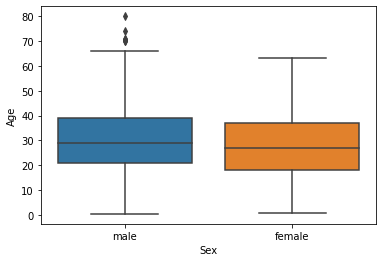

In [16]:
sns.boxplot(x="Sex",y="Age",data=titanic)

In [17]:
titanic["Age"].groupby(by=titanic["Sex"]).mean()

Sex
female    27.915709
male      30.726645
Name: Age, dtype: float64

In [18]:
def get_age(cols):
    sex = cols[0]
    age = cols[1]
    if sex == "male":
        return 31
    else:
        return 28


In [19]:
titanic["Age"] = titanic[["Sex","Age"]].apply(get_age, axis=1)

In [20]:
titanic.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age           0
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
Title         0
dtype: int64

In [21]:
titanic[titanic["Embarked"].isnull()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
PassengerId,,,,,,,,,,,,
62,1,1,"Icard, Miss. Amelie",female,28,0,0,113572,80.0,B28,NaN,Miss
830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,28,0,0,113572,80.0,B28,NaN,Mrs


In [22]:
sex = pd.get_dummies(titanic["Sex"], drop_first=True)
sex

,male
PassengerId,
1,1
2,0
3,0
4,0
5,1
...,...
887,1
888,0
889,0


In [23]:
title = pd.get_dummies(titanic["Title"])
title

,Master,Miss,Mr,Mrs
PassengerId,,,,
1,0,0,1,0
2,0,0,0,1
3,0,1,0,0
4,0,0,0,1
5,0,0,1,0
...,...,...,...,...
887,0,0,1,0
888,0,1,0,0
889,0,1,0,0


In [24]:
titanic = pd.concat([titanic,sex],axis=1)

In [25]:
from sklearn.model_selection import train_test_split

In [42]:
X= pd.concat([titanic[["male","Age","Fare"]],title],axis=1)
y= titanic["Survived"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [27]:
from sklearn.ensemble import RandomForestClassifier

In [73]:
rfc = RandomForestClassifier(max_depth=3, n_estimators=63)

In [74]:
rfc.fit(X_train, y_train)

RandomForestClassifier(max_depth=3, n_estimators=63)

In [30]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [31]:
print(confusion_matrix(y_test,rfc.predict(X_test)))
print(classification_report(y_test,rfc.predict(X_test)))
print(accuracy_score(y_test,rfc.predict(X_test)))

# Earlier, max_depth = 10

[[158  17]
 [ 41  79]]
              precision    recall  f1-score   support

           0       0.79      0.90      0.84       175
           1       0.82      0.66      0.73       120

    accuracy                           0.80       295
   macro avg       0.81      0.78      0.79       295
weighted avg       0.81      0.80      0.80       295

0.8033898305084746


In [75]:
print(confusion_matrix(y_test,rfc.predict(X_test)))
print(classification_report(y_test,rfc.predict(X_test)))
print(accuracy_score(y_test,rfc.predict(X_test)))
# New

[[150  25]
 [ 32  88]]
              precision    recall  f1-score   support

           0       0.82      0.86      0.84       175
           1       0.78      0.73      0.76       120

    accuracy                           0.81       295
   macro avg       0.80      0.80      0.80       295
weighted avg       0.81      0.81      0.81       295

0.8067796610169492


In [32]:
from sklearn.tree import DecisionTreeClassifier

In [54]:
dtc = DecisionTreeClassifier(max_depth=1)

In [55]:
dtc.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=1)

In [56]:
print(confusion_matrix(y_test,dtc.predict(X_test)))
print(classification_report(y_test,dtc.predict(X_test)))
print(accuracy_score(y_test,dtc.predict(X_test)))

[[147  28]
 [ 27  93]]
              precision    recall  f1-score   support

           0       0.84      0.84      0.84       175
           1       0.77      0.78      0.77       120

    accuracy                           0.81       295
   macro avg       0.81      0.81      0.81       295
weighted avg       0.81      0.81      0.81       295

0.8135593220338984


In [57]:
param_grid = {'max_depth': [i for i in range(2,16)], 'n_estimators': [i for i in range(1,101)]} 

In [58]:
from sklearn.model_selection import GridSearchCV

In [62]:
gscv = GridSearchCV(RandomForestClassifier(),param_grid,refit=True,verbose=3)

In [63]:
gscv.fit(X_train,y_train)

Fitting 5 folds for each of 1400 candidates, totalling 7000 fits
[CV] max_depth=2, n_estimators=1 .....................................
[CV] ......... max_depth=2, n_estimators=1, score=0.750, total=   0.0s
[CV] max_depth=2, n_estimators=1 .....................................
[CV] ......... max_depth=2, n_estimators=1, score=0.874, total=   0.0s
[CV] max_depth=2, n_estimators=1 .....................................
[CV] ......... max_depth=2, n_estimators=1, score=0.697, total=   0.0s
[CV] max_depth=2, n_estimators=1 .....................................
[CV] ......... max_depth=2, n_estimators=1, score=0.756, total=   0.0s
[CV] max_depth=2, n_estimators=1 .....................................
[CV] ......... max_depth=2, n_estimators=1, score=0.807, total=   0.0s
[CV] max_depth=2, n_estimators=2 .....................................
[CV] ......... max_depth=2, n_estimators=2, score=0.717, total=   0.0s
[CV] max_depth=2, n_estimators=2 .....................................
[CV] .......

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] ......... max_depth=2, n_estimators=2, score=0.790, total=   0.0s
[CV] max_depth=2, n_estimators=2 .....................................
[CV] ......... max_depth=2, n_estimators=2, score=0.807, total=   0.0s
[CV] max_depth=2, n_estimators=3 .....................................
[CV] ......... max_depth=2, n_estimators=3, score=0.717, total=   0.0s
[CV] max_depth=2, n_estimators=3 .....................................
[CV] ......... max_depth=2, n_estimators=3, score=0.874, total=   0.0s
[CV] max_depth=2, n_estimators=3 .....................................
[CV] ......... max_depth=2, n_estimators=3, score=0.697, total=   0.0s
[CV] max_depth=2, n_estimators=3 .....................................
[CV] ......... max_depth=2, n_estimators=3, score=0.773, total=   0.0s
[CV] max_depth=2, n_estimators=3 .....................................
[CV] ......... max_depth=2, n_estimators=3, score=0.807, total=   0.0s
[CV] max_depth=2, n_estimators=4 .....................................
[CV] .

[CV] ........ max_depth=2, n_estimators=14, score=0.874, total=   0.1s
[CV] max_depth=2, n_estimators=14 ....................................
[CV] ........ max_depth=2, n_estimators=14, score=0.706, total=   0.0s
[CV] max_depth=2, n_estimators=14 ....................................
[CV] ........ max_depth=2, n_estimators=14, score=0.790, total=   0.0s
[CV] max_depth=2, n_estimators=14 ....................................
[CV] ........ max_depth=2, n_estimators=14, score=0.807, total=   0.1s
[CV] max_depth=2, n_estimators=15 ....................................
[CV] ........ max_depth=2, n_estimators=15, score=0.717, total=   0.1s
[CV] max_depth=2, n_estimators=15 ....................................
[CV] ........ max_depth=2, n_estimators=15, score=0.874, total=   0.1s
[CV] max_depth=2, n_estimators=15 ....................................
[CV] ........ max_depth=2, n_estimators=15, score=0.706, total=   0.1s
[CV] max_depth=2, n_estimators=15 ....................................
[CV] .

[CV] ........ max_depth=2, n_estimators=26, score=0.733, total=   0.1s
[CV] max_depth=2, n_estimators=26 ....................................
[CV] ........ max_depth=2, n_estimators=26, score=0.874, total=   0.1s
[CV] max_depth=2, n_estimators=26 ....................................
[CV] ........ max_depth=2, n_estimators=26, score=0.706, total=   0.1s
[CV] max_depth=2, n_estimators=26 ....................................
[CV] ........ max_depth=2, n_estimators=26, score=0.790, total=   0.1s
[CV] max_depth=2, n_estimators=26 ....................................
[CV] ........ max_depth=2, n_estimators=26, score=0.807, total=   0.1s
[CV] max_depth=2, n_estimators=27 ....................................
[CV] ........ max_depth=2, n_estimators=27, score=0.733, total=   0.1s
[CV] max_depth=2, n_estimators=27 ....................................
[CV] ........ max_depth=2, n_estimators=27, score=0.874, total=   0.1s
[CV] max_depth=2, n_estimators=27 ....................................
[CV] .

[CV] ........ max_depth=2, n_estimators=37, score=0.807, total=   0.1s
[CV] max_depth=2, n_estimators=38 ....................................
[CV] ........ max_depth=2, n_estimators=38, score=0.717, total=   0.1s
[CV] max_depth=2, n_estimators=38 ....................................
[CV] ........ max_depth=2, n_estimators=38, score=0.874, total=   0.1s
[CV] max_depth=2, n_estimators=38 ....................................
[CV] ........ max_depth=2, n_estimators=38, score=0.706, total=   0.1s
[CV] max_depth=2, n_estimators=38 ....................................
[CV] ........ max_depth=2, n_estimators=38, score=0.790, total=   0.1s
[CV] max_depth=2, n_estimators=38 ....................................
[CV] ........ max_depth=2, n_estimators=38, score=0.807, total=   0.1s
[CV] max_depth=2, n_estimators=39 ....................................
[CV] ........ max_depth=2, n_estimators=39, score=0.717, total=   0.1s
[CV] max_depth=2, n_estimators=39 ....................................
[CV] .

[CV] ........ max_depth=2, n_estimators=49, score=0.706, total=   0.1s
[CV] max_depth=2, n_estimators=49 ....................................
[CV] ........ max_depth=2, n_estimators=49, score=0.782, total=   0.1s
[CV] max_depth=2, n_estimators=49 ....................................
[CV] ........ max_depth=2, n_estimators=49, score=0.807, total=   0.1s
[CV] max_depth=2, n_estimators=50 ....................................
[CV] ........ max_depth=2, n_estimators=50, score=0.733, total=   0.1s
[CV] max_depth=2, n_estimators=50 ....................................
[CV] ........ max_depth=2, n_estimators=50, score=0.874, total=   0.1s
[CV] max_depth=2, n_estimators=50 ....................................
[CV] ........ max_depth=2, n_estimators=50, score=0.681, total=   0.1s
[CV] max_depth=2, n_estimators=50 ....................................
[CV] ........ max_depth=2, n_estimators=50, score=0.790, total=   0.2s
[CV] max_depth=2, n_estimators=50 ....................................
[CV] .

[CV] ........ max_depth=2, n_estimators=61, score=0.874, total=   0.2s
[CV] max_depth=2, n_estimators=61 ....................................
[CV] ........ max_depth=2, n_estimators=61, score=0.706, total=   0.1s
[CV] max_depth=2, n_estimators=61 ....................................
[CV] ........ max_depth=2, n_estimators=61, score=0.790, total=   0.2s
[CV] max_depth=2, n_estimators=61 ....................................
[CV] ........ max_depth=2, n_estimators=61, score=0.807, total=   0.2s
[CV] max_depth=2, n_estimators=62 ....................................
[CV] ........ max_depth=2, n_estimators=62, score=0.733, total=   0.2s
[CV] max_depth=2, n_estimators=62 ....................................
[CV] ........ max_depth=2, n_estimators=62, score=0.874, total=   0.2s
[CV] max_depth=2, n_estimators=62 ....................................
[CV] ........ max_depth=2, n_estimators=62, score=0.706, total=   0.2s
[CV] max_depth=2, n_estimators=62 ....................................
[CV] .

[CV] ........ max_depth=2, n_estimators=73, score=0.733, total=   0.2s
[CV] max_depth=2, n_estimators=73 ....................................
[CV] ........ max_depth=2, n_estimators=73, score=0.874, total=   0.2s
[CV] max_depth=2, n_estimators=73 ....................................
[CV] ........ max_depth=2, n_estimators=73, score=0.706, total=   0.2s
[CV] max_depth=2, n_estimators=73 ....................................
[CV] ........ max_depth=2, n_estimators=73, score=0.782, total=   0.3s
[CV] max_depth=2, n_estimators=73 ....................................
[CV] ........ max_depth=2, n_estimators=73, score=0.807, total=   0.2s
[CV] max_depth=2, n_estimators=74 ....................................
[CV] ........ max_depth=2, n_estimators=74, score=0.733, total=   0.2s
[CV] max_depth=2, n_estimators=74 ....................................
[CV] ........ max_depth=2, n_estimators=74, score=0.874, total=   0.2s
[CV] max_depth=2, n_estimators=74 ....................................
[CV] .

[CV] ........ max_depth=2, n_estimators=84, score=0.807, total=   0.2s
[CV] max_depth=2, n_estimators=85 ....................................
[CV] ........ max_depth=2, n_estimators=85, score=0.717, total=   0.2s
[CV] max_depth=2, n_estimators=85 ....................................
[CV] ........ max_depth=2, n_estimators=85, score=0.874, total=   0.2s
[CV] max_depth=2, n_estimators=85 ....................................
[CV] ........ max_depth=2, n_estimators=85, score=0.706, total=   0.2s
[CV] max_depth=2, n_estimators=85 ....................................
[CV] ........ max_depth=2, n_estimators=85, score=0.790, total=   0.2s
[CV] max_depth=2, n_estimators=85 ....................................
[CV] ........ max_depth=2, n_estimators=85, score=0.807, total=   0.2s
[CV] max_depth=2, n_estimators=86 ....................................
[CV] ........ max_depth=2, n_estimators=86, score=0.733, total=   0.2s
[CV] max_depth=2, n_estimators=86 ....................................
[CV] .

[CV] ........ max_depth=2, n_estimators=96, score=0.706, total=   0.2s
[CV] max_depth=2, n_estimators=96 ....................................
[CV] ........ max_depth=2, n_estimators=96, score=0.790, total=   0.2s
[CV] max_depth=2, n_estimators=96 ....................................
[CV] ........ max_depth=2, n_estimators=96, score=0.807, total=   0.2s
[CV] max_depth=2, n_estimators=97 ....................................
[CV] ........ max_depth=2, n_estimators=97, score=0.733, total=   0.2s
[CV] max_depth=2, n_estimators=97 ....................................
[CV] ........ max_depth=2, n_estimators=97, score=0.874, total=   0.3s
[CV] max_depth=2, n_estimators=97 ....................................
[CV] ........ max_depth=2, n_estimators=97, score=0.706, total=   0.3s
[CV] max_depth=2, n_estimators=97 ....................................
[CV] ........ max_depth=2, n_estimators=97, score=0.790, total=   0.3s
[CV] max_depth=2, n_estimators=97 ....................................
[CV] .

[CV] ......... max_depth=3, n_estimators=8, score=0.773, total=   0.0s
[CV] max_depth=3, n_estimators=8 .....................................
[CV] ......... max_depth=3, n_estimators=8, score=0.824, total=   0.0s
[CV] max_depth=3, n_estimators=9 .....................................
[CV] ......... max_depth=3, n_estimators=9, score=0.725, total=   0.1s
[CV] max_depth=3, n_estimators=9 .....................................
[CV] ......... max_depth=3, n_estimators=9, score=0.874, total=   0.0s
[CV] max_depth=3, n_estimators=9 .....................................
[CV] ......... max_depth=3, n_estimators=9, score=0.731, total=   0.0s
[CV] max_depth=3, n_estimators=9 .....................................
[CV] ......... max_depth=3, n_estimators=9, score=0.824, total=   0.0s
[CV] max_depth=3, n_estimators=9 .....................................
[CV] ......... max_depth=3, n_estimators=9, score=0.824, total=   0.0s
[CV] max_depth=3, n_estimators=10 ....................................
[CV] .

[CV] ........ max_depth=3, n_estimators=20, score=0.882, total=   0.1s
[CV] max_depth=3, n_estimators=20 ....................................
[CV] ........ max_depth=3, n_estimators=20, score=0.706, total=   0.1s
[CV] max_depth=3, n_estimators=20 ....................................
[CV] ........ max_depth=3, n_estimators=20, score=0.832, total=   0.0s
[CV] max_depth=3, n_estimators=20 ....................................
[CV] ........ max_depth=3, n_estimators=20, score=0.824, total=   0.1s
[CV] max_depth=3, n_estimators=21 ....................................
[CV] ........ max_depth=3, n_estimators=21, score=0.725, total=   0.1s
[CV] max_depth=3, n_estimators=21 ....................................
[CV] ........ max_depth=3, n_estimators=21, score=0.882, total=   0.1s
[CV] max_depth=3, n_estimators=21 ....................................
[CV] ........ max_depth=3, n_estimators=21, score=0.723, total=   0.0s
[CV] max_depth=3, n_estimators=21 ....................................
[CV] .

[CV] ........ max_depth=3, n_estimators=31, score=0.824, total=   0.1s
[CV] max_depth=3, n_estimators=32 ....................................
[CV] ........ max_depth=3, n_estimators=32, score=0.725, total=   0.1s
[CV] max_depth=3, n_estimators=32 ....................................
[CV] ........ max_depth=3, n_estimators=32, score=0.866, total=   0.1s
[CV] max_depth=3, n_estimators=32 ....................................
[CV] ........ max_depth=3, n_estimators=32, score=0.723, total=   0.1s
[CV] max_depth=3, n_estimators=32 ....................................
[CV] ........ max_depth=3, n_estimators=32, score=0.773, total=   0.1s
[CV] max_depth=3, n_estimators=32 ....................................
[CV] ........ max_depth=3, n_estimators=32, score=0.824, total=   0.1s
[CV] max_depth=3, n_estimators=33 ....................................
[CV] ........ max_depth=3, n_estimators=33, score=0.725, total=   0.1s
[CV] max_depth=3, n_estimators=33 ....................................
[CV] .

[CV] ........ max_depth=3, n_estimators=43, score=0.723, total=   0.1s
[CV] max_depth=3, n_estimators=43 ....................................
[CV] ........ max_depth=3, n_estimators=43, score=0.824, total=   0.1s
[CV] max_depth=3, n_estimators=43 ....................................
[CV] ........ max_depth=3, n_estimators=43, score=0.824, total=   0.2s
[CV] max_depth=3, n_estimators=44 ....................................
[CV] ........ max_depth=3, n_estimators=44, score=0.725, total=   0.1s
[CV] max_depth=3, n_estimators=44 ....................................
[CV] ........ max_depth=3, n_estimators=44, score=0.882, total=   0.1s
[CV] max_depth=3, n_estimators=44 ....................................
[CV] ........ max_depth=3, n_estimators=44, score=0.706, total=   0.1s
[CV] max_depth=3, n_estimators=44 ....................................
[CV] ........ max_depth=3, n_estimators=44, score=0.832, total=   0.1s
[CV] max_depth=3, n_estimators=44 ....................................
[CV] .

[CV] ........ max_depth=3, n_estimators=55, score=0.725, total=   0.2s
[CV] max_depth=3, n_estimators=55 ....................................
[CV] ........ max_depth=3, n_estimators=55, score=0.882, total=   0.2s
[CV] max_depth=3, n_estimators=55 ....................................
[CV] ........ max_depth=3, n_estimators=55, score=0.723, total=   0.2s
[CV] max_depth=3, n_estimators=55 ....................................
[CV] ........ max_depth=3, n_estimators=55, score=0.790, total=   0.2s
[CV] max_depth=3, n_estimators=55 ....................................
[CV] ........ max_depth=3, n_estimators=55, score=0.824, total=   0.2s
[CV] max_depth=3, n_estimators=56 ....................................
[CV] ........ max_depth=3, n_estimators=56, score=0.725, total=   0.1s
[CV] max_depth=3, n_estimators=56 ....................................
[CV] ........ max_depth=3, n_estimators=56, score=0.882, total=   0.1s
[CV] max_depth=3, n_estimators=56 ....................................
[CV] .

[CV] ........ max_depth=3, n_estimators=66, score=0.824, total=   0.2s
[CV] max_depth=3, n_estimators=67 ....................................
[CV] ........ max_depth=3, n_estimators=67, score=0.725, total=   0.2s
[CV] max_depth=3, n_estimators=67 ....................................
[CV] ........ max_depth=3, n_estimators=67, score=0.882, total=   0.2s
[CV] max_depth=3, n_estimators=67 ....................................
[CV] ........ max_depth=3, n_estimators=67, score=0.706, total=   0.2s
[CV] max_depth=3, n_estimators=67 ....................................
[CV] ........ max_depth=3, n_estimators=67, score=0.798, total=   0.2s
[CV] max_depth=3, n_estimators=67 ....................................
[CV] ........ max_depth=3, n_estimators=67, score=0.824, total=   0.2s
[CV] max_depth=3, n_estimators=68 ....................................
[CV] ........ max_depth=3, n_estimators=68, score=0.725, total=   0.3s
[CV] max_depth=3, n_estimators=68 ....................................
[CV] .

[CV] ........ max_depth=3, n_estimators=78, score=0.723, total=   0.2s
[CV] max_depth=3, n_estimators=78 ....................................
[CV] ........ max_depth=3, n_estimators=78, score=0.824, total=   0.2s
[CV] max_depth=3, n_estimators=78 ....................................
[CV] ........ max_depth=3, n_estimators=78, score=0.824, total=   0.2s
[CV] max_depth=3, n_estimators=79 ....................................
[CV] ........ max_depth=3, n_estimators=79, score=0.725, total=   0.3s
[CV] max_depth=3, n_estimators=79 ....................................
[CV] ........ max_depth=3, n_estimators=79, score=0.866, total=   0.2s
[CV] max_depth=3, n_estimators=79 ....................................
[CV] ........ max_depth=3, n_estimators=79, score=0.723, total=   0.3s
[CV] max_depth=3, n_estimators=79 ....................................
[CV] ........ max_depth=3, n_estimators=79, score=0.824, total=   0.3s
[CV] max_depth=3, n_estimators=79 ....................................
[CV] .

[CV] ........ max_depth=3, n_estimators=90, score=0.725, total=   0.3s
[CV] max_depth=3, n_estimators=90 ....................................
[CV] ........ max_depth=3, n_estimators=90, score=0.882, total=   0.2s
[CV] max_depth=3, n_estimators=90 ....................................
[CV] ........ max_depth=3, n_estimators=90, score=0.723, total=   0.2s
[CV] max_depth=3, n_estimators=90 ....................................
[CV] ........ max_depth=3, n_estimators=90, score=0.824, total=   0.2s
[CV] max_depth=3, n_estimators=90 ....................................
[CV] ........ max_depth=3, n_estimators=90, score=0.824, total=   0.2s
[CV] max_depth=3, n_estimators=91 ....................................
[CV] ........ max_depth=3, n_estimators=91, score=0.725, total=   0.2s
[CV] max_depth=3, n_estimators=91 ....................................
[CV] ........ max_depth=3, n_estimators=91, score=0.874, total=   0.2s
[CV] max_depth=3, n_estimators=91 ....................................
[CV] .

[CV] ......... max_depth=4, n_estimators=3, score=0.725, total=   0.0s
[CV] max_depth=4, n_estimators=3 .....................................
[CV] ......... max_depth=4, n_estimators=3, score=0.866, total=   0.0s
[CV] max_depth=4, n_estimators=3 .....................................
[CV] ......... max_depth=4, n_estimators=3, score=0.723, total=   0.0s
[CV] max_depth=4, n_estimators=3 .....................................
[CV] ......... max_depth=4, n_estimators=3, score=0.773, total=   0.0s
[CV] max_depth=4, n_estimators=3 .....................................
[CV] ......... max_depth=4, n_estimators=3, score=0.782, total=   0.0s
[CV] max_depth=4, n_estimators=4 .....................................
[CV] ......... max_depth=4, n_estimators=4, score=0.725, total=   0.0s
[CV] max_depth=4, n_estimators=4 .....................................
[CV] ......... max_depth=4, n_estimators=4, score=0.866, total=   0.0s
[CV] max_depth=4, n_estimators=4 .....................................
[CV] .

[CV] ........ max_depth=4, n_estimators=15, score=0.725, total=   0.1s
[CV] max_depth=4, n_estimators=15 ....................................
[CV] ........ max_depth=4, n_estimators=15, score=0.832, total=   0.1s
[CV] max_depth=4, n_estimators=15 ....................................
[CV] ........ max_depth=4, n_estimators=15, score=0.706, total=   0.1s
[CV] max_depth=4, n_estimators=15 ....................................
[CV] ........ max_depth=4, n_estimators=15, score=0.773, total=   0.1s
[CV] max_depth=4, n_estimators=15 ....................................
[CV] ........ max_depth=4, n_estimators=15, score=0.807, total=   0.1s
[CV] max_depth=4, n_estimators=16 ....................................
[CV] ........ max_depth=4, n_estimators=16, score=0.733, total=   0.1s
[CV] max_depth=4, n_estimators=16 ....................................
[CV] ........ max_depth=4, n_estimators=16, score=0.866, total=   0.0s
[CV] max_depth=4, n_estimators=16 ....................................
[CV] .

[CV] ........ max_depth=4, n_estimators=26, score=0.824, total=   0.1s
[CV] max_depth=4, n_estimators=27 ....................................
[CV] ........ max_depth=4, n_estimators=27, score=0.733, total=   0.1s
[CV] max_depth=4, n_estimators=27 ....................................
[CV] ........ max_depth=4, n_estimators=27, score=0.857, total=   0.1s
[CV] max_depth=4, n_estimators=27 ....................................
[CV] ........ max_depth=4, n_estimators=27, score=0.731, total=   0.1s
[CV] max_depth=4, n_estimators=27 ....................................
[CV] ........ max_depth=4, n_estimators=27, score=0.798, total=   0.1s
[CV] max_depth=4, n_estimators=27 ....................................
[CV] ........ max_depth=4, n_estimators=27, score=0.807, total=   0.1s
[CV] max_depth=4, n_estimators=28 ....................................
[CV] ........ max_depth=4, n_estimators=28, score=0.733, total=   0.1s
[CV] max_depth=4, n_estimators=28 ....................................
[CV] .

[CV] ........ max_depth=4, n_estimators=38, score=0.773, total=   0.1s
[CV] max_depth=4, n_estimators=38 ....................................
[CV] ........ max_depth=4, n_estimators=38, score=0.815, total=   0.1s
[CV] max_depth=4, n_estimators=39 ....................................
[CV] ........ max_depth=4, n_estimators=39, score=0.733, total=   0.1s
[CV] max_depth=4, n_estimators=39 ....................................
[CV] ........ max_depth=4, n_estimators=39, score=0.849, total=   0.2s
[CV] max_depth=4, n_estimators=39 ....................................
[CV] ........ max_depth=4, n_estimators=39, score=0.731, total=   0.1s
[CV] max_depth=4, n_estimators=39 ....................................
[CV] ........ max_depth=4, n_estimators=39, score=0.782, total=   0.1s
[CV] max_depth=4, n_estimators=39 ....................................
[CV] ........ max_depth=4, n_estimators=39, score=0.807, total=   0.1s
[CV] max_depth=4, n_estimators=40 ....................................
[CV] .

[CV] ........ max_depth=4, n_estimators=50, score=0.857, total=   0.2s
[CV] max_depth=4, n_estimators=50 ....................................
[CV] ........ max_depth=4, n_estimators=50, score=0.714, total=   0.1s
[CV] max_depth=4, n_estimators=50 ....................................
[CV] ........ max_depth=4, n_estimators=50, score=0.790, total=   0.2s
[CV] max_depth=4, n_estimators=50 ....................................
[CV] ........ max_depth=4, n_estimators=50, score=0.807, total=   0.1s
[CV] max_depth=4, n_estimators=51 ....................................
[CV] ........ max_depth=4, n_estimators=51, score=0.733, total=   0.1s
[CV] max_depth=4, n_estimators=51 ....................................
[CV] ........ max_depth=4, n_estimators=51, score=0.866, total=   0.2s
[CV] max_depth=4, n_estimators=51 ....................................
[CV] ........ max_depth=4, n_estimators=51, score=0.714, total=   0.2s
[CV] max_depth=4, n_estimators=51 ....................................
[CV] .

[CV] ........ max_depth=4, n_estimators=61, score=0.815, total=   0.2s
[CV] max_depth=4, n_estimators=62 ....................................
[CV] ........ max_depth=4, n_estimators=62, score=0.733, total=   0.1s
[CV] max_depth=4, n_estimators=62 ....................................
[CV] ........ max_depth=4, n_estimators=62, score=0.857, total=   0.3s
[CV] max_depth=4, n_estimators=62 ....................................
[CV] ........ max_depth=4, n_estimators=62, score=0.731, total=   0.2s
[CV] max_depth=4, n_estimators=62 ....................................
[CV] ........ max_depth=4, n_estimators=62, score=0.790, total=   0.2s
[CV] max_depth=4, n_estimators=62 ....................................
[CV] ........ max_depth=4, n_estimators=62, score=0.807, total=   0.2s
[CV] max_depth=4, n_estimators=63 ....................................
[CV] ........ max_depth=4, n_estimators=63, score=0.733, total=   0.2s
[CV] max_depth=4, n_estimators=63 ....................................
[CV] .

[CV] ........ max_depth=4, n_estimators=73, score=0.714, total=   0.3s
[CV] max_depth=4, n_estimators=73 ....................................
[CV] ........ max_depth=4, n_estimators=73, score=0.790, total=   0.3s
[CV] max_depth=4, n_estimators=73 ....................................
[CV] ........ max_depth=4, n_estimators=73, score=0.807, total=   0.3s
[CV] max_depth=4, n_estimators=74 ....................................
[CV] ........ max_depth=4, n_estimators=74, score=0.733, total=   0.3s
[CV] max_depth=4, n_estimators=74 ....................................
[CV] ........ max_depth=4, n_estimators=74, score=0.874, total=   0.3s
[CV] max_depth=4, n_estimators=74 ....................................
[CV] ........ max_depth=4, n_estimators=74, score=0.723, total=   0.3s
[CV] max_depth=4, n_estimators=74 ....................................
[CV] ........ max_depth=4, n_estimators=74, score=0.807, total=   0.2s
[CV] max_depth=4, n_estimators=74 ....................................
[CV] .

[CV] ........ max_depth=4, n_estimators=85, score=0.733, total=   0.3s
[CV] max_depth=4, n_estimators=85 ....................................
[CV] ........ max_depth=4, n_estimators=85, score=0.874, total=   0.3s
[CV] max_depth=4, n_estimators=85 ....................................
[CV] ........ max_depth=4, n_estimators=85, score=0.714, total=   0.3s
[CV] max_depth=4, n_estimators=85 ....................................
[CV] ........ max_depth=4, n_estimators=85, score=0.798, total=   0.3s
[CV] max_depth=4, n_estimators=85 ....................................
[CV] ........ max_depth=4, n_estimators=85, score=0.824, total=   0.3s
[CV] max_depth=4, n_estimators=86 ....................................
[CV] ........ max_depth=4, n_estimators=86, score=0.733, total=   0.3s
[CV] max_depth=4, n_estimators=86 ....................................
[CV] ........ max_depth=4, n_estimators=86, score=0.866, total=   0.3s
[CV] max_depth=4, n_estimators=86 ....................................
[CV] .

[CV] ........ max_depth=4, n_estimators=96, score=0.782, total=   0.3s
[CV] max_depth=4, n_estimators=96 ....................................
[CV] ........ max_depth=4, n_estimators=96, score=0.815, total=   0.3s
[CV] max_depth=4, n_estimators=97 ....................................
[CV] ........ max_depth=4, n_estimators=97, score=0.733, total=   0.3s
[CV] max_depth=4, n_estimators=97 ....................................
[CV] ........ max_depth=4, n_estimators=97, score=0.874, total=   0.3s
[CV] max_depth=4, n_estimators=97 ....................................
[CV] ........ max_depth=4, n_estimators=97, score=0.731, total=   0.2s
[CV] max_depth=4, n_estimators=97 ....................................
[CV] ........ max_depth=4, n_estimators=97, score=0.807, total=   0.3s
[CV] max_depth=4, n_estimators=97 ....................................
[CV] ........ max_depth=4, n_estimators=97, score=0.824, total=   0.3s
[CV] max_depth=4, n_estimators=98 ....................................
[CV] .

[CV] ......... max_depth=5, n_estimators=8, score=0.824, total=   0.0s
[CV] max_depth=5, n_estimators=8 .....................................
[CV] ......... max_depth=5, n_estimators=8, score=0.739, total=   0.0s
[CV] max_depth=5, n_estimators=8 .....................................
[CV] ......... max_depth=5, n_estimators=8, score=0.773, total=   0.0s
[CV] max_depth=5, n_estimators=8 .....................................
[CV] ......... max_depth=5, n_estimators=8, score=0.782, total=   0.0s
[CV] max_depth=5, n_estimators=9 .....................................
[CV] ......... max_depth=5, n_estimators=9, score=0.742, total=   0.0s
[CV] max_depth=5, n_estimators=9 .....................................
[CV] ......... max_depth=5, n_estimators=9, score=0.832, total=   0.0s
[CV] max_depth=5, n_estimators=9 .....................................
[CV] ......... max_depth=5, n_estimators=9, score=0.756, total=   0.1s
[CV] max_depth=5, n_estimators=9 .....................................
[CV] .

[CV] ........ max_depth=5, n_estimators=19, score=0.798, total=   0.1s
[CV] max_depth=5, n_estimators=20 ....................................
[CV] ........ max_depth=5, n_estimators=20, score=0.742, total=   0.1s
[CV] max_depth=5, n_estimators=20 ....................................
[CV] ........ max_depth=5, n_estimators=20, score=0.832, total=   0.1s
[CV] max_depth=5, n_estimators=20 ....................................
[CV] ........ max_depth=5, n_estimators=20, score=0.739, total=   0.1s
[CV] max_depth=5, n_estimators=20 ....................................
[CV] ........ max_depth=5, n_estimators=20, score=0.798, total=   0.1s
[CV] max_depth=5, n_estimators=20 ....................................
[CV] ........ max_depth=5, n_estimators=20, score=0.790, total=   0.1s
[CV] max_depth=5, n_estimators=21 ....................................
[CV] ........ max_depth=5, n_estimators=21, score=0.733, total=   0.1s
[CV] max_depth=5, n_estimators=21 ....................................
[CV] .

[CV] ........ max_depth=5, n_estimators=31, score=0.739, total=   0.1s
[CV] max_depth=5, n_estimators=31 ....................................
[CV] ........ max_depth=5, n_estimators=31, score=0.790, total=   0.2s
[CV] max_depth=5, n_estimators=31 ....................................
[CV] ........ max_depth=5, n_estimators=31, score=0.815, total=   0.1s
[CV] max_depth=5, n_estimators=32 ....................................
[CV] ........ max_depth=5, n_estimators=32, score=0.733, total=   0.1s
[CV] max_depth=5, n_estimators=32 ....................................
[CV] ........ max_depth=5, n_estimators=32, score=0.866, total=   0.1s
[CV] max_depth=5, n_estimators=32 ....................................
[CV] ........ max_depth=5, n_estimators=32, score=0.739, total=   0.1s
[CV] max_depth=5, n_estimators=32 ....................................
[CV] ........ max_depth=5, n_estimators=32, score=0.773, total=   0.1s
[CV] max_depth=5, n_estimators=32 ....................................
[CV] .

[CV] ........ max_depth=5, n_estimators=43, score=0.840, total=   0.1s
[CV] max_depth=5, n_estimators=43 ....................................
[CV] ........ max_depth=5, n_estimators=43, score=0.739, total=   0.1s
[CV] max_depth=5, n_estimators=43 ....................................
[CV] ........ max_depth=5, n_estimators=43, score=0.782, total=   0.1s
[CV] max_depth=5, n_estimators=43 ....................................
[CV] ........ max_depth=5, n_estimators=43, score=0.832, total=   0.1s
[CV] max_depth=5, n_estimators=44 ....................................
[CV] ........ max_depth=5, n_estimators=44, score=0.742, total=   0.1s
[CV] max_depth=5, n_estimators=44 ....................................
[CV] ........ max_depth=5, n_estimators=44, score=0.832, total=   0.1s
[CV] max_depth=5, n_estimators=44 ....................................
[CV] ........ max_depth=5, n_estimators=44, score=0.739, total=   0.1s
[CV] max_depth=5, n_estimators=44 ....................................
[CV] .

[CV] ........ max_depth=5, n_estimators=55, score=0.733, total=   0.2s
[CV] max_depth=5, n_estimators=55 ....................................
[CV] ........ max_depth=5, n_estimators=55, score=0.840, total=   0.2s
[CV] max_depth=5, n_estimators=55 ....................................
[CV] ........ max_depth=5, n_estimators=55, score=0.739, total=   0.2s
[CV] max_depth=5, n_estimators=55 ....................................
[CV] ........ max_depth=5, n_estimators=55, score=0.773, total=   0.2s
[CV] max_depth=5, n_estimators=55 ....................................
[CV] ........ max_depth=5, n_estimators=55, score=0.807, total=   0.2s
[CV] max_depth=5, n_estimators=56 ....................................
[CV] ........ max_depth=5, n_estimators=56, score=0.742, total=   0.2s
[CV] max_depth=5, n_estimators=56 ....................................
[CV] ........ max_depth=5, n_estimators=56, score=0.874, total=   0.2s
[CV] max_depth=5, n_estimators=56 ....................................
[CV] .

[CV] ........ max_depth=5, n_estimators=66, score=0.790, total=   0.3s
[CV] max_depth=5, n_estimators=66 ....................................
[CV] ........ max_depth=5, n_estimators=66, score=0.824, total=   0.2s
[CV] max_depth=5, n_estimators=67 ....................................
[CV] ........ max_depth=5, n_estimators=67, score=0.742, total=   0.2s
[CV] max_depth=5, n_estimators=67 ....................................
[CV] ........ max_depth=5, n_estimators=67, score=0.857, total=   0.2s
[CV] max_depth=5, n_estimators=67 ....................................
[CV] ........ max_depth=5, n_estimators=67, score=0.739, total=   0.3s
[CV] max_depth=5, n_estimators=67 ....................................
[CV] ........ max_depth=5, n_estimators=67, score=0.773, total=   0.2s
[CV] max_depth=5, n_estimators=67 ....................................
[CV] ........ max_depth=5, n_estimators=67, score=0.815, total=   0.2s
[CV] max_depth=5, n_estimators=68 ....................................
[CV] .

[CV] ........ max_depth=5, n_estimators=78, score=0.840, total=   0.2s
[CV] max_depth=5, n_estimators=78 ....................................
[CV] ........ max_depth=5, n_estimators=78, score=0.739, total=   0.2s
[CV] max_depth=5, n_estimators=78 ....................................
[CV] ........ max_depth=5, n_estimators=78, score=0.782, total=   0.2s
[CV] max_depth=5, n_estimators=78 ....................................
[CV] ........ max_depth=5, n_estimators=78, score=0.840, total=   0.2s
[CV] max_depth=5, n_estimators=79 ....................................
[CV] ........ max_depth=5, n_estimators=79, score=0.733, total=   0.3s
[CV] max_depth=5, n_estimators=79 ....................................
[CV] ........ max_depth=5, n_estimators=79, score=0.840, total=   0.2s
[CV] max_depth=5, n_estimators=79 ....................................
[CV] ........ max_depth=5, n_estimators=79, score=0.739, total=   0.2s
[CV] max_depth=5, n_estimators=79 ....................................
[CV] .

[CV] ........ max_depth=5, n_estimators=89, score=0.824, total=   0.3s
[CV] max_depth=5, n_estimators=90 ....................................
[CV] ........ max_depth=5, n_estimators=90, score=0.733, total=   0.2s
[CV] max_depth=5, n_estimators=90 ....................................
[CV] ........ max_depth=5, n_estimators=90, score=0.857, total=   0.4s
[CV] max_depth=5, n_estimators=90 ....................................
[CV] ........ max_depth=5, n_estimators=90, score=0.739, total=   0.3s
[CV] max_depth=5, n_estimators=90 ....................................
[CV] ........ max_depth=5, n_estimators=90, score=0.765, total=   0.2s
[CV] max_depth=5, n_estimators=90 ....................................
[CV] ........ max_depth=5, n_estimators=90, score=0.824, total=   0.3s
[CV] max_depth=5, n_estimators=91 ....................................
[CV] ........ max_depth=5, n_estimators=91, score=0.742, total=   0.2s
[CV] max_depth=5, n_estimators=91 ....................................
[CV] .

[CV] ......... max_depth=6, n_estimators=3, score=0.750, total=   0.0s
[CV] max_depth=6, n_estimators=3 .....................................
[CV] ......... max_depth=6, n_estimators=3, score=0.866, total=   0.0s
[CV] max_depth=6, n_estimators=3 .....................................
[CV] ......... max_depth=6, n_estimators=3, score=0.739, total=   0.0s
[CV] max_depth=6, n_estimators=3 .....................................
[CV] ......... max_depth=6, n_estimators=3, score=0.790, total=   0.0s
[CV] max_depth=6, n_estimators=3 .....................................
[CV] ......... max_depth=6, n_estimators=3, score=0.765, total=   0.0s
[CV] max_depth=6, n_estimators=4 .....................................
[CV] ......... max_depth=6, n_estimators=4, score=0.742, total=   0.0s
[CV] max_depth=6, n_estimators=4 .....................................
[CV] ......... max_depth=6, n_estimators=4, score=0.824, total=   0.0s
[CV] max_depth=6, n_estimators=4 .....................................
[CV] .

[CV] ........ max_depth=6, n_estimators=14, score=0.773, total=   0.0s
[CV] max_depth=6, n_estimators=15 ....................................
[CV] ........ max_depth=6, n_estimators=15, score=0.733, total=   0.1s
[CV] max_depth=6, n_estimators=15 ....................................
[CV] ........ max_depth=6, n_estimators=15, score=0.815, total=   0.0s
[CV] max_depth=6, n_estimators=15 ....................................
[CV] ........ max_depth=6, n_estimators=15, score=0.739, total=   0.0s
[CV] max_depth=6, n_estimators=15 ....................................
[CV] ........ max_depth=6, n_estimators=15, score=0.748, total=   0.1s
[CV] max_depth=6, n_estimators=15 ....................................
[CV] ........ max_depth=6, n_estimators=15, score=0.773, total=   0.1s
[CV] max_depth=6, n_estimators=16 ....................................
[CV] ........ max_depth=6, n_estimators=16, score=0.742, total=   0.1s
[CV] max_depth=6, n_estimators=16 ....................................
[CV] .

[CV] ........ max_depth=6, n_estimators=26, score=0.773, total=   0.1s
[CV] max_depth=6, n_estimators=26 ....................................
[CV] ........ max_depth=6, n_estimators=26, score=0.798, total=   0.1s
[CV] max_depth=6, n_estimators=27 ....................................
[CV] ........ max_depth=6, n_estimators=27, score=0.758, total=   0.1s
[CV] max_depth=6, n_estimators=27 ....................................
[CV] ........ max_depth=6, n_estimators=27, score=0.815, total=   0.1s
[CV] max_depth=6, n_estimators=27 ....................................
[CV] ........ max_depth=6, n_estimators=27, score=0.748, total=   0.1s
[CV] max_depth=6, n_estimators=27 ....................................
[CV] ........ max_depth=6, n_estimators=27, score=0.782, total=   0.1s
[CV] max_depth=6, n_estimators=27 ....................................
[CV] ........ max_depth=6, n_estimators=27, score=0.782, total=   0.1s
[CV] max_depth=6, n_estimators=28 ....................................
[CV] .

[CV] ........ max_depth=6, n_estimators=38, score=0.815, total=   0.1s
[CV] max_depth=6, n_estimators=38 ....................................
[CV] ........ max_depth=6, n_estimators=38, score=0.739, total=   0.2s
[CV] max_depth=6, n_estimators=38 ....................................
[CV] ........ max_depth=6, n_estimators=38, score=0.782, total=   0.2s
[CV] max_depth=6, n_estimators=38 ....................................
[CV] ........ max_depth=6, n_estimators=38, score=0.824, total=   0.2s
[CV] max_depth=6, n_estimators=39 ....................................
[CV] ........ max_depth=6, n_estimators=39, score=0.742, total=   0.1s
[CV] max_depth=6, n_estimators=39 ....................................
[CV] ........ max_depth=6, n_estimators=39, score=0.840, total=   0.1s
[CV] max_depth=6, n_estimators=39 ....................................
[CV] ........ max_depth=6, n_estimators=39, score=0.748, total=   0.1s
[CV] max_depth=6, n_estimators=39 ....................................
[CV] .

[CV] ........ max_depth=6, n_estimators=49, score=0.790, total=   0.1s
[CV] max_depth=6, n_estimators=50 ....................................
[CV] ........ max_depth=6, n_estimators=50, score=0.733, total=   0.1s
[CV] max_depth=6, n_estimators=50 ....................................
[CV] ........ max_depth=6, n_estimators=50, score=0.857, total=   0.1s
[CV] max_depth=6, n_estimators=50 ....................................
[CV] ........ max_depth=6, n_estimators=50, score=0.723, total=   0.1s
[CV] max_depth=6, n_estimators=50 ....................................
[CV] ........ max_depth=6, n_estimators=50, score=0.790, total=   0.2s
[CV] max_depth=6, n_estimators=50 ....................................
[CV] ........ max_depth=6, n_estimators=50, score=0.790, total=   0.2s
[CV] max_depth=6, n_estimators=51 ....................................
[CV] ........ max_depth=6, n_estimators=51, score=0.742, total=   0.2s
[CV] max_depth=6, n_estimators=51 ....................................
[CV] .

[CV] ........ max_depth=6, n_estimators=61, score=0.731, total=   0.2s
[CV] max_depth=6, n_estimators=61 ....................................
[CV] ........ max_depth=6, n_estimators=61, score=0.765, total=   0.2s
[CV] max_depth=6, n_estimators=61 ....................................
[CV] ........ max_depth=6, n_estimators=61, score=0.790, total=   0.2s
[CV] max_depth=6, n_estimators=62 ....................................
[CV] ........ max_depth=6, n_estimators=62, score=0.733, total=   0.2s
[CV] max_depth=6, n_estimators=62 ....................................
[CV] ........ max_depth=6, n_estimators=62, score=0.824, total=   0.2s
[CV] max_depth=6, n_estimators=62 ....................................
[CV] ........ max_depth=6, n_estimators=62, score=0.748, total=   0.2s
[CV] max_depth=6, n_estimators=62 ....................................
[CV] ........ max_depth=6, n_estimators=62, score=0.782, total=   0.2s
[CV] max_depth=6, n_estimators=62 ....................................
[CV] .

[CV] ........ max_depth=6, n_estimators=73, score=0.857, total=   0.2s
[CV] max_depth=6, n_estimators=73 ....................................
[CV] ........ max_depth=6, n_estimators=73, score=0.739, total=   0.2s
[CV] max_depth=6, n_estimators=73 ....................................
[CV] ........ max_depth=6, n_estimators=73, score=0.782, total=   0.2s
[CV] max_depth=6, n_estimators=73 ....................................
[CV] ........ max_depth=6, n_estimators=73, score=0.773, total=   0.3s
[CV] max_depth=6, n_estimators=74 ....................................
[CV] ........ max_depth=6, n_estimators=74, score=0.733, total=   0.2s
[CV] max_depth=6, n_estimators=74 ....................................
[CV] ........ max_depth=6, n_estimators=74, score=0.832, total=   0.2s
[CV] max_depth=6, n_estimators=74 ....................................
[CV] ........ max_depth=6, n_estimators=74, score=0.739, total=   0.3s
[CV] max_depth=6, n_estimators=74 ....................................
[CV] .

[CV] ........ max_depth=6, n_estimators=84, score=0.782, total=   0.3s
[CV] max_depth=6, n_estimators=85 ....................................
[CV] ........ max_depth=6, n_estimators=85, score=0.733, total=   0.3s
[CV] max_depth=6, n_estimators=85 ....................................
[CV] ........ max_depth=6, n_estimators=85, score=0.824, total=   0.3s
[CV] max_depth=6, n_estimators=85 ....................................
[CV] ........ max_depth=6, n_estimators=85, score=0.739, total=   0.3s
[CV] max_depth=6, n_estimators=85 ....................................
[CV] ........ max_depth=6, n_estimators=85, score=0.756, total=   0.3s
[CV] max_depth=6, n_estimators=85 ....................................
[CV] ........ max_depth=6, n_estimators=85, score=0.790, total=   0.3s
[CV] max_depth=6, n_estimators=86 ....................................
[CV] ........ max_depth=6, n_estimators=86, score=0.733, total=   0.3s
[CV] max_depth=6, n_estimators=86 ....................................
[CV] .

[CV] ........ max_depth=6, n_estimators=96, score=0.739, total=   0.3s
[CV] max_depth=6, n_estimators=96 ....................................
[CV] ........ max_depth=6, n_estimators=96, score=0.773, total=   0.3s
[CV] max_depth=6, n_estimators=96 ....................................
[CV] ........ max_depth=6, n_estimators=96, score=0.807, total=   0.3s
[CV] max_depth=6, n_estimators=97 ....................................
[CV] ........ max_depth=6, n_estimators=97, score=0.742, total=   0.3s
[CV] max_depth=6, n_estimators=97 ....................................
[CV] ........ max_depth=6, n_estimators=97, score=0.840, total=   0.2s
[CV] max_depth=6, n_estimators=97 ....................................
[CV] ........ max_depth=6, n_estimators=97, score=0.739, total=   0.2s
[CV] max_depth=6, n_estimators=97 ....................................
[CV] ........ max_depth=6, n_estimators=97, score=0.773, total=   0.3s
[CV] max_depth=6, n_estimators=97 ....................................
[CV] .

[CV] ......... max_depth=7, n_estimators=8, score=0.731, total=   0.0s
[CV] max_depth=7, n_estimators=8 .....................................
[CV] ......... max_depth=7, n_estimators=8, score=0.798, total=   0.0s
[CV] max_depth=7, n_estimators=9 .....................................
[CV] ......... max_depth=7, n_estimators=9, score=0.725, total=   0.0s
[CV] max_depth=7, n_estimators=9 .....................................
[CV] ......... max_depth=7, n_estimators=9, score=0.798, total=   0.0s
[CV] max_depth=7, n_estimators=9 .....................................
[CV] ......... max_depth=7, n_estimators=9, score=0.756, total=   0.0s
[CV] max_depth=7, n_estimators=9 .....................................
[CV] ......... max_depth=7, n_estimators=9, score=0.765, total=   0.0s
[CV] max_depth=7, n_estimators=9 .....................................
[CV] ......... max_depth=7, n_estimators=9, score=0.773, total=   0.0s
[CV] max_depth=7, n_estimators=10 ....................................
[CV] .

[CV] ........ max_depth=7, n_estimators=20, score=0.765, total=   0.1s
[CV] max_depth=7, n_estimators=20 ....................................
[CV] ........ max_depth=7, n_estimators=20, score=0.773, total=   0.1s
[CV] max_depth=7, n_estimators=21 ....................................
[CV] ........ max_depth=7, n_estimators=21, score=0.733, total=   0.1s
[CV] max_depth=7, n_estimators=21 ....................................
[CV] ........ max_depth=7, n_estimators=21, score=0.832, total=   0.1s
[CV] max_depth=7, n_estimators=21 ....................................
[CV] ........ max_depth=7, n_estimators=21, score=0.748, total=   0.1s
[CV] max_depth=7, n_estimators=21 ....................................
[CV] ........ max_depth=7, n_estimators=21, score=0.765, total=   0.1s
[CV] max_depth=7, n_estimators=21 ....................................
[CV] ........ max_depth=7, n_estimators=21, score=0.773, total=   0.1s
[CV] max_depth=7, n_estimators=22 ....................................
[CV] .

[CV] ........ max_depth=7, n_estimators=32, score=0.840, total=   0.1s
[CV] max_depth=7, n_estimators=32 ....................................
[CV] ........ max_depth=7, n_estimators=32, score=0.748, total=   0.1s
[CV] max_depth=7, n_estimators=32 ....................................
[CV] ........ max_depth=7, n_estimators=32, score=0.756, total=   0.1s
[CV] max_depth=7, n_estimators=32 ....................................
[CV] ........ max_depth=7, n_estimators=32, score=0.790, total=   0.1s
[CV] max_depth=7, n_estimators=33 ....................................
[CV] ........ max_depth=7, n_estimators=33, score=0.750, total=   0.1s
[CV] max_depth=7, n_estimators=33 ....................................
[CV] ........ max_depth=7, n_estimators=33, score=0.824, total=   0.1s
[CV] max_depth=7, n_estimators=33 ....................................
[CV] ........ max_depth=7, n_estimators=33, score=0.723, total=   0.1s
[CV] max_depth=7, n_estimators=33 ....................................
[CV] .

[CV] ........ max_depth=7, n_estimators=43, score=0.790, total=   0.1s
[CV] max_depth=7, n_estimators=44 ....................................
[CV] ........ max_depth=7, n_estimators=44, score=0.750, total=   0.1s
[CV] max_depth=7, n_estimators=44 ....................................
[CV] ........ max_depth=7, n_estimators=44, score=0.815, total=   0.1s
[CV] max_depth=7, n_estimators=44 ....................................
[CV] ........ max_depth=7, n_estimators=44, score=0.723, total=   0.1s
[CV] max_depth=7, n_estimators=44 ....................................
[CV] ........ max_depth=7, n_estimators=44, score=0.782, total=   0.1s
[CV] max_depth=7, n_estimators=44 ....................................
[CV] ........ max_depth=7, n_estimators=44, score=0.773, total=   0.1s
[CV] max_depth=7, n_estimators=45 ....................................
[CV] ........ max_depth=7, n_estimators=45, score=0.742, total=   0.1s
[CV] max_depth=7, n_estimators=45 ....................................
[CV] .

[CV] ........ max_depth=7, n_estimators=55, score=0.748, total=   0.1s
[CV] max_depth=7, n_estimators=55 ....................................
[CV] ........ max_depth=7, n_estimators=55, score=0.765, total=   0.1s
[CV] max_depth=7, n_estimators=55 ....................................
[CV] ........ max_depth=7, n_estimators=55, score=0.782, total=   0.1s
[CV] max_depth=7, n_estimators=56 ....................................
[CV] ........ max_depth=7, n_estimators=56, score=0.767, total=   0.1s
[CV] max_depth=7, n_estimators=56 ....................................
[CV] ........ max_depth=7, n_estimators=56, score=0.832, total=   0.1s
[CV] max_depth=7, n_estimators=56 ....................................
[CV] ........ max_depth=7, n_estimators=56, score=0.748, total=   0.1s
[CV] max_depth=7, n_estimators=56 ....................................
[CV] ........ max_depth=7, n_estimators=56, score=0.748, total=   0.2s
[CV] max_depth=7, n_estimators=56 ....................................
[CV] .

[CV] ........ max_depth=7, n_estimators=67, score=0.742, total=   0.2s
[CV] max_depth=7, n_estimators=67 ....................................
[CV] ........ max_depth=7, n_estimators=67, score=0.824, total=   0.2s
[CV] max_depth=7, n_estimators=67 ....................................
[CV] ........ max_depth=7, n_estimators=67, score=0.748, total=   0.2s
[CV] max_depth=7, n_estimators=67 ....................................
[CV] ........ max_depth=7, n_estimators=67, score=0.739, total=   0.2s
[CV] max_depth=7, n_estimators=67 ....................................
[CV] ........ max_depth=7, n_estimators=67, score=0.782, total=   0.2s
[CV] max_depth=7, n_estimators=68 ....................................
[CV] ........ max_depth=7, n_estimators=68, score=0.742, total=   0.2s
[CV] max_depth=7, n_estimators=68 ....................................
[CV] ........ max_depth=7, n_estimators=68, score=0.815, total=   0.3s
[CV] max_depth=7, n_estimators=68 ....................................
[CV] .

[CV] ........ max_depth=7, n_estimators=78, score=0.765, total=   0.3s
[CV] max_depth=7, n_estimators=78 ....................................
[CV] ........ max_depth=7, n_estimators=78, score=0.782, total=   0.3s
[CV] max_depth=7, n_estimators=79 ....................................
[CV] ........ max_depth=7, n_estimators=79, score=0.742, total=   0.3s
[CV] max_depth=7, n_estimators=79 ....................................
[CV] ........ max_depth=7, n_estimators=79, score=0.807, total=   0.3s
[CV] max_depth=7, n_estimators=79 ....................................
[CV] ........ max_depth=7, n_estimators=79, score=0.748, total=   0.2s
[CV] max_depth=7, n_estimators=79 ....................................
[CV] ........ max_depth=7, n_estimators=79, score=0.739, total=   0.3s
[CV] max_depth=7, n_estimators=79 ....................................
[CV] ........ max_depth=7, n_estimators=79, score=0.782, total=   0.3s
[CV] max_depth=7, n_estimators=80 ....................................
[CV] .

[CV] ........ max_depth=7, n_estimators=90, score=0.815, total=   0.3s
[CV] max_depth=7, n_estimators=90 ....................................
[CV] ........ max_depth=7, n_estimators=90, score=0.748, total=   0.2s
[CV] max_depth=7, n_estimators=90 ....................................
[CV] ........ max_depth=7, n_estimators=90, score=0.765, total=   0.3s
[CV] max_depth=7, n_estimators=90 ....................................
[CV] ........ max_depth=7, n_estimators=90, score=0.782, total=   0.3s
[CV] max_depth=7, n_estimators=91 ....................................
[CV] ........ max_depth=7, n_estimators=91, score=0.750, total=   0.2s
[CV] max_depth=7, n_estimators=91 ....................................
[CV] ........ max_depth=7, n_estimators=91, score=0.832, total=   0.3s
[CV] max_depth=7, n_estimators=91 ....................................
[CV] ........ max_depth=7, n_estimators=91, score=0.748, total=   0.2s
[CV] max_depth=7, n_estimators=91 ....................................
[CV] .

[CV] ......... max_depth=8, n_estimators=3, score=0.807, total=   0.0s
[CV] max_depth=8, n_estimators=3 .....................................
[CV] ......... max_depth=8, n_estimators=3, score=0.714, total=   0.0s
[CV] max_depth=8, n_estimators=3 .....................................
[CV] ......... max_depth=8, n_estimators=3, score=0.798, total=   0.0s
[CV] max_depth=8, n_estimators=3 .....................................
[CV] ......... max_depth=8, n_estimators=3, score=0.807, total=   0.0s
[CV] max_depth=8, n_estimators=4 .....................................
[CV] ......... max_depth=8, n_estimators=4, score=0.742, total=   0.0s
[CV] max_depth=8, n_estimators=4 .....................................
[CV] ......... max_depth=8, n_estimators=4, score=0.832, total=   0.0s
[CV] max_depth=8, n_estimators=4 .....................................
[CV] ......... max_depth=8, n_estimators=4, score=0.714, total=   0.0s
[CV] max_depth=8, n_estimators=4 .....................................
[CV] .

[CV] ........ max_depth=8, n_estimators=14, score=0.773, total=   0.0s
[CV] max_depth=8, n_estimators=15 ....................................
[CV] ........ max_depth=8, n_estimators=15, score=0.758, total=   0.1s
[CV] max_depth=8, n_estimators=15 ....................................
[CV] ........ max_depth=8, n_estimators=15, score=0.807, total=   0.0s
[CV] max_depth=8, n_estimators=15 ....................................
[CV] ........ max_depth=8, n_estimators=15, score=0.723, total=   0.1s
[CV] max_depth=8, n_estimators=15 ....................................
[CV] ........ max_depth=8, n_estimators=15, score=0.773, total=   0.1s
[CV] max_depth=8, n_estimators=15 ....................................
[CV] ........ max_depth=8, n_estimators=15, score=0.773, total=   0.1s
[CV] max_depth=8, n_estimators=16 ....................................
[CV] ........ max_depth=8, n_estimators=16, score=0.750, total=   0.1s
[CV] max_depth=8, n_estimators=16 ....................................
[CV] .

[CV] max_depth=8, n_estimators=26 ....................................
[CV] ........ max_depth=8, n_estimators=26, score=0.773, total=   0.1s
[CV] max_depth=8, n_estimators=27 ....................................
[CV] ........ max_depth=8, n_estimators=27, score=0.758, total=   0.1s
[CV] max_depth=8, n_estimators=27 ....................................
[CV] ........ max_depth=8, n_estimators=27, score=0.840, total=   0.1s
[CV] max_depth=8, n_estimators=27 ....................................
[CV] ........ max_depth=8, n_estimators=27, score=0.723, total=   0.1s
[CV] max_depth=8, n_estimators=27 ....................................
[CV] ........ max_depth=8, n_estimators=27, score=0.731, total=   0.1s
[CV] max_depth=8, n_estimators=27 ....................................
[CV] ........ max_depth=8, n_estimators=27, score=0.790, total=   0.1s
[CV] max_depth=8, n_estimators=28 ....................................
[CV] ........ max_depth=8, n_estimators=28, score=0.750, total=   0.1s
[CV] m

[CV] ........ max_depth=8, n_estimators=38, score=0.748, total=   0.1s
[CV] max_depth=8, n_estimators=38 ....................................
[CV] ........ max_depth=8, n_estimators=38, score=0.773, total=   0.1s
[CV] max_depth=8, n_estimators=39 ....................................
[CV] ........ max_depth=8, n_estimators=39, score=0.742, total=   0.2s
[CV] max_depth=8, n_estimators=39 ....................................
[CV] ........ max_depth=8, n_estimators=39, score=0.798, total=   0.1s
[CV] max_depth=8, n_estimators=39 ....................................
[CV] ........ max_depth=8, n_estimators=39, score=0.723, total=   0.1s
[CV] max_depth=8, n_estimators=39 ....................................
[CV] ........ max_depth=8, n_estimators=39, score=0.765, total=   0.1s
[CV] max_depth=8, n_estimators=39 ....................................
[CV] ........ max_depth=8, n_estimators=39, score=0.773, total=   0.1s
[CV] max_depth=8, n_estimators=40 ....................................
[CV] .

[CV] ........ max_depth=8, n_estimators=50, score=0.723, total=   0.2s
[CV] max_depth=8, n_estimators=50 ....................................
[CV] ........ max_depth=8, n_estimators=50, score=0.756, total=   0.2s
[CV] max_depth=8, n_estimators=50 ....................................
[CV] ........ max_depth=8, n_estimators=50, score=0.773, total=   0.2s
[CV] max_depth=8, n_estimators=51 ....................................
[CV] ........ max_depth=8, n_estimators=51, score=0.742, total=   0.1s
[CV] max_depth=8, n_estimators=51 ....................................
[CV] ........ max_depth=8, n_estimators=51, score=0.824, total=   0.2s
[CV] max_depth=8, n_estimators=51 ....................................
[CV] ........ max_depth=8, n_estimators=51, score=0.723, total=   0.1s
[CV] max_depth=8, n_estimators=51 ....................................
[CV] ........ max_depth=8, n_estimators=51, score=0.756, total=   0.1s
[CV] max_depth=8, n_estimators=51 ....................................
[CV] .

[CV] ........ max_depth=8, n_estimators=62, score=0.750, total=   0.2s
[CV] max_depth=8, n_estimators=62 ....................................
[CV] ........ max_depth=8, n_estimators=62, score=0.824, total=   0.2s
[CV] max_depth=8, n_estimators=62 ....................................
[CV] ........ max_depth=8, n_estimators=62, score=0.714, total=   0.2s
[CV] max_depth=8, n_estimators=62 ....................................
[CV] ........ max_depth=8, n_estimators=62, score=0.765, total=   0.2s
[CV] max_depth=8, n_estimators=62 ....................................
[CV] ........ max_depth=8, n_estimators=62, score=0.765, total=   0.3s
[CV] max_depth=8, n_estimators=63 ....................................
[CV] ........ max_depth=8, n_estimators=63, score=0.742, total=   0.2s
[CV] max_depth=8, n_estimators=63 ....................................
[CV] ........ max_depth=8, n_estimators=63, score=0.840, total=   0.3s
[CV] max_depth=8, n_estimators=63 ....................................
[CV] .

[CV] ........ max_depth=8, n_estimators=73, score=0.765, total=   0.2s
[CV] max_depth=8, n_estimators=73 ....................................
[CV] ........ max_depth=8, n_estimators=73, score=0.773, total=   0.3s
[CV] max_depth=8, n_estimators=74 ....................................
[CV] ........ max_depth=8, n_estimators=74, score=0.742, total=   0.3s
[CV] max_depth=8, n_estimators=74 ....................................
[CV] ........ max_depth=8, n_estimators=74, score=0.840, total=   0.3s
[CV] max_depth=8, n_estimators=74 ....................................
[CV] ........ max_depth=8, n_estimators=74, score=0.723, total=   0.2s
[CV] max_depth=8, n_estimators=74 ....................................
[CV] ........ max_depth=8, n_estimators=74, score=0.756, total=   0.2s
[CV] max_depth=8, n_estimators=74 ....................................
[CV] ........ max_depth=8, n_estimators=74, score=0.765, total=   0.2s
[CV] max_depth=8, n_estimators=75 ....................................
[CV] .

[CV] ........ max_depth=8, n_estimators=85, score=0.832, total=   0.3s
[CV] max_depth=8, n_estimators=85 ....................................
[CV] ........ max_depth=8, n_estimators=85, score=0.723, total=   0.3s
[CV] max_depth=8, n_estimators=85 ....................................
[CV] ........ max_depth=8, n_estimators=85, score=0.748, total=   0.3s
[CV] max_depth=8, n_estimators=85 ....................................
[CV] ........ max_depth=8, n_estimators=85, score=0.782, total=   0.3s
[CV] max_depth=8, n_estimators=86 ....................................
[CV] ........ max_depth=8, n_estimators=86, score=0.742, total=   0.3s
[CV] max_depth=8, n_estimators=86 ....................................
[CV] ........ max_depth=8, n_estimators=86, score=0.815, total=   0.4s
[CV] max_depth=8, n_estimators=86 ....................................
[CV] ........ max_depth=8, n_estimators=86, score=0.748, total=   0.3s
[CV] max_depth=8, n_estimators=86 ....................................
[CV] .

[CV] ........ max_depth=8, n_estimators=96, score=0.765, total=   0.3s
[CV] max_depth=8, n_estimators=97 ....................................
[CV] ........ max_depth=8, n_estimators=97, score=0.742, total=   0.3s
[CV] max_depth=8, n_estimators=97 ....................................
[CV] ........ max_depth=8, n_estimators=97, score=0.832, total=   0.3s
[CV] max_depth=8, n_estimators=97 ....................................
[CV] ........ max_depth=8, n_estimators=97, score=0.723, total=   0.3s
[CV] max_depth=8, n_estimators=97 ....................................
[CV] ........ max_depth=8, n_estimators=97, score=0.748, total=   0.3s
[CV] max_depth=8, n_estimators=97 ....................................
[CV] ........ max_depth=8, n_estimators=97, score=0.782, total=   0.2s
[CV] max_depth=8, n_estimators=98 ....................................
[CV] ........ max_depth=8, n_estimators=98, score=0.742, total=   0.3s
[CV] max_depth=8, n_estimators=98 ....................................
[CV] .

[CV] ......... max_depth=9, n_estimators=9, score=0.748, total=   0.0s
[CV] max_depth=9, n_estimators=9 .....................................
[CV] ......... max_depth=9, n_estimators=9, score=0.748, total=   0.0s
[CV] max_depth=9, n_estimators=9 .....................................
[CV] ......... max_depth=9, n_estimators=9, score=0.782, total=   0.0s
[CV] max_depth=9, n_estimators=10 ....................................
[CV] ........ max_depth=9, n_estimators=10, score=0.767, total=   0.1s
[CV] max_depth=9, n_estimators=10 ....................................
[CV] ........ max_depth=9, n_estimators=10, score=0.857, total=   0.0s
[CV] max_depth=9, n_estimators=10 ....................................
[CV] ........ max_depth=9, n_estimators=10, score=0.723, total=   0.0s
[CV] max_depth=9, n_estimators=10 ....................................
[CV] ........ max_depth=9, n_estimators=10, score=0.765, total=   0.0s
[CV] max_depth=9, n_estimators=10 ....................................
[CV] .

[CV] ........ max_depth=9, n_estimators=21, score=0.824, total=   0.1s
[CV] max_depth=9, n_estimators=21 ....................................
[CV] ........ max_depth=9, n_estimators=21, score=0.748, total=   0.1s
[CV] max_depth=9, n_estimators=21 ....................................
[CV] ........ max_depth=9, n_estimators=21, score=0.765, total=   0.1s
[CV] max_depth=9, n_estimators=21 ....................................
[CV] ........ max_depth=9, n_estimators=21, score=0.756, total=   0.1s
[CV] max_depth=9, n_estimators=22 ....................................
[CV] ........ max_depth=9, n_estimators=22, score=0.767, total=   0.1s
[CV] max_depth=9, n_estimators=22 ....................................
[CV] ........ max_depth=9, n_estimators=22, score=0.840, total=   0.1s
[CV] max_depth=9, n_estimators=22 ....................................
[CV] ........ max_depth=9, n_estimators=22, score=0.723, total=   0.1s
[CV] max_depth=9, n_estimators=22 ....................................
[CV] .

[CV] ........ max_depth=9, n_estimators=32, score=0.773, total=   0.1s
[CV] max_depth=9, n_estimators=33 ....................................
[CV] ........ max_depth=9, n_estimators=33, score=0.758, total=   0.1s
[CV] max_depth=9, n_estimators=33 ....................................
[CV] ........ max_depth=9, n_estimators=33, score=0.807, total=   0.1s
[CV] max_depth=9, n_estimators=33 ....................................
[CV] ........ max_depth=9, n_estimators=33, score=0.731, total=   0.1s
[CV] max_depth=9, n_estimators=33 ....................................
[CV] ........ max_depth=9, n_estimators=33, score=0.739, total=   0.1s
[CV] max_depth=9, n_estimators=33 ....................................
[CV] ........ max_depth=9, n_estimators=33, score=0.765, total=   0.1s
[CV] max_depth=9, n_estimators=34 ....................................
[CV] ........ max_depth=9, n_estimators=34, score=0.742, total=   0.1s
[CV] max_depth=9, n_estimators=34 ....................................
[CV] .

[CV] ........ max_depth=9, n_estimators=44, score=0.748, total=   0.2s
[CV] max_depth=9, n_estimators=44 ....................................
[CV] ........ max_depth=9, n_estimators=44, score=0.773, total=   0.1s
[CV] max_depth=9, n_estimators=44 ....................................
[CV] ........ max_depth=9, n_estimators=44, score=0.765, total=   0.1s
[CV] max_depth=9, n_estimators=45 ....................................
[CV] ........ max_depth=9, n_estimators=45, score=0.750, total=   0.1s
[CV] max_depth=9, n_estimators=45 ....................................
[CV] ........ max_depth=9, n_estimators=45, score=0.807, total=   0.1s
[CV] max_depth=9, n_estimators=45 ....................................
[CV] ........ max_depth=9, n_estimators=45, score=0.748, total=   0.2s
[CV] max_depth=9, n_estimators=45 ....................................
[CV] ........ max_depth=9, n_estimators=45, score=0.748, total=   0.2s
[CV] max_depth=9, n_estimators=45 ....................................
[CV] .

[CV] ........ max_depth=9, n_estimators=56, score=0.733, total=   0.2s
[CV] max_depth=9, n_estimators=56 ....................................
[CV] ........ max_depth=9, n_estimators=56, score=0.807, total=   0.2s
[CV] max_depth=9, n_estimators=56 ....................................
[CV] ........ max_depth=9, n_estimators=56, score=0.731, total=   0.1s
[CV] max_depth=9, n_estimators=56 ....................................
[CV] ........ max_depth=9, n_estimators=56, score=0.756, total=   0.2s
[CV] max_depth=9, n_estimators=56 ....................................
[CV] ........ max_depth=9, n_estimators=56, score=0.765, total=   0.1s
[CV] max_depth=9, n_estimators=57 ....................................
[CV] ........ max_depth=9, n_estimators=57, score=0.733, total=   0.2s
[CV] max_depth=9, n_estimators=57 ....................................
[CV] ........ max_depth=9, n_estimators=57, score=0.824, total=   0.2s
[CV] max_depth=9, n_estimators=57 ....................................
[CV] .

[CV] ........ max_depth=9, n_estimators=67, score=0.756, total=   0.2s
[CV] max_depth=9, n_estimators=67 ....................................
[CV] ........ max_depth=9, n_estimators=67, score=0.790, total=   0.2s
[CV] max_depth=9, n_estimators=68 ....................................
[CV] ........ max_depth=9, n_estimators=68, score=0.750, total=   0.2s
[CV] max_depth=9, n_estimators=68 ....................................
[CV] ........ max_depth=9, n_estimators=68, score=0.824, total=   0.3s
[CV] max_depth=9, n_estimators=68 ....................................
[CV] ........ max_depth=9, n_estimators=68, score=0.723, total=   0.2s
[CV] max_depth=9, n_estimators=68 ....................................
[CV] ........ max_depth=9, n_estimators=68, score=0.765, total=   0.2s
[CV] max_depth=9, n_estimators=68 ....................................
[CV] ........ max_depth=9, n_estimators=68, score=0.790, total=   0.2s
[CV] max_depth=9, n_estimators=69 ....................................
[CV] .

[CV] ........ max_depth=9, n_estimators=79, score=0.824, total=   0.2s
[CV] max_depth=9, n_estimators=79 ....................................
[CV] ........ max_depth=9, n_estimators=79, score=0.723, total=   0.3s
[CV] max_depth=9, n_estimators=79 ....................................
[CV] ........ max_depth=9, n_estimators=79, score=0.765, total=   0.2s
[CV] max_depth=9, n_estimators=79 ....................................
[CV] ........ max_depth=9, n_estimators=79, score=0.765, total=   0.3s
[CV] max_depth=9, n_estimators=80 ....................................
[CV] ........ max_depth=9, n_estimators=80, score=0.733, total=   0.3s
[CV] max_depth=9, n_estimators=80 ....................................
[CV] ........ max_depth=9, n_estimators=80, score=0.832, total=   0.2s
[CV] max_depth=9, n_estimators=80 ....................................
[CV] ........ max_depth=9, n_estimators=80, score=0.723, total=   0.2s
[CV] max_depth=9, n_estimators=80 ....................................
[CV] .

[CV] ........ max_depth=9, n_estimators=90, score=0.773, total=   0.3s
[CV] max_depth=9, n_estimators=91 ....................................
[CV] ........ max_depth=9, n_estimators=91, score=0.742, total=   0.3s
[CV] max_depth=9, n_estimators=91 ....................................
[CV] ........ max_depth=9, n_estimators=91, score=0.807, total=   0.2s
[CV] max_depth=9, n_estimators=91 ....................................
[CV] ........ max_depth=9, n_estimators=91, score=0.748, total=   0.2s
[CV] max_depth=9, n_estimators=91 ....................................
[CV] ........ max_depth=9, n_estimators=91, score=0.748, total=   0.3s
[CV] max_depth=9, n_estimators=91 ....................................
[CV] ........ max_depth=9, n_estimators=91, score=0.773, total=   0.3s
[CV] max_depth=9, n_estimators=92 ....................................
[CV] ........ max_depth=9, n_estimators=92, score=0.758, total=   0.3s
[CV] max_depth=9, n_estimators=92 ....................................
[CV] .

[CV] ........ max_depth=10, n_estimators=2, score=0.790, total=   0.0s
[CV] max_depth=10, n_estimators=3 ....................................
[CV] ........ max_depth=10, n_estimators=3, score=0.758, total=   0.0s
[CV] max_depth=10, n_estimators=3 ....................................
[CV] ........ max_depth=10, n_estimators=3, score=0.790, total=   0.0s
[CV] max_depth=10, n_estimators=3 ....................................
[CV] ........ max_depth=10, n_estimators=3, score=0.723, total=   0.0s
[CV] max_depth=10, n_estimators=3 ....................................
[CV] ........ max_depth=10, n_estimators=3, score=0.798, total=   0.0s
[CV] max_depth=10, n_estimators=3 ....................................
[CV] ........ max_depth=10, n_estimators=3, score=0.782, total=   0.0s
[CV] max_depth=10, n_estimators=4 ....................................
[CV] ........ max_depth=10, n_estimators=4, score=0.733, total=   0.0s
[CV] max_depth=10, n_estimators=4 ....................................
[CV] .

[CV] max_depth=10, n_estimators=14 ...................................
[CV] ....... max_depth=10, n_estimators=14, score=0.756, total=   0.1s
[CV] max_depth=10, n_estimators=15 ...................................
[CV] ....... max_depth=10, n_estimators=15, score=0.725, total=   0.1s
[CV] max_depth=10, n_estimators=15 ...................................
[CV] ....... max_depth=10, n_estimators=15, score=0.807, total=   0.1s
[CV] max_depth=10, n_estimators=15 ...................................
[CV] ....... max_depth=10, n_estimators=15, score=0.731, total=   0.1s
[CV] max_depth=10, n_estimators=15 ...................................
[CV] ....... max_depth=10, n_estimators=15, score=0.773, total=   0.0s
[CV] max_depth=10, n_estimators=15 ...................................
[CV] ....... max_depth=10, n_estimators=15, score=0.790, total=   0.0s
[CV] max_depth=10, n_estimators=16 ...................................
[CV] ....... max_depth=10, n_estimators=16, score=0.733, total=   0.0s
[CV] m

[CV] ....... max_depth=10, n_estimators=26, score=0.739, total=   0.1s
[CV] max_depth=10, n_estimators=26 ...................................
[CV] ....... max_depth=10, n_estimators=26, score=0.782, total=   0.1s
[CV] max_depth=10, n_estimators=27 ...................................
[CV] ....... max_depth=10, n_estimators=27, score=0.775, total=   0.1s
[CV] max_depth=10, n_estimators=27 ...................................
[CV] ....... max_depth=10, n_estimators=27, score=0.815, total=   0.1s
[CV] max_depth=10, n_estimators=27 ...................................
[CV] ....... max_depth=10, n_estimators=27, score=0.731, total=   0.1s
[CV] max_depth=10, n_estimators=27 ...................................
[CV] ....... max_depth=10, n_estimators=27, score=0.773, total=   0.1s
[CV] max_depth=10, n_estimators=27 ...................................
[CV] ....... max_depth=10, n_estimators=27, score=0.782, total=   0.1s
[CV] max_depth=10, n_estimators=28 ...................................
[CV] .

[CV] ....... max_depth=10, n_estimators=38, score=0.815, total=   0.1s
[CV] max_depth=10, n_estimators=38 ...................................
[CV] ....... max_depth=10, n_estimators=38, score=0.731, total=   0.1s
[CV] max_depth=10, n_estimators=38 ...................................
[CV] ....... max_depth=10, n_estimators=38, score=0.773, total=   0.1s
[CV] max_depth=10, n_estimators=38 ...................................
[CV] ....... max_depth=10, n_estimators=38, score=0.782, total=   0.1s
[CV] max_depth=10, n_estimators=39 ...................................
[CV] ....... max_depth=10, n_estimators=39, score=0.733, total=   0.1s
[CV] max_depth=10, n_estimators=39 ...................................
[CV] ....... max_depth=10, n_estimators=39, score=0.824, total=   0.1s
[CV] max_depth=10, n_estimators=39 ...................................
[CV] ....... max_depth=10, n_estimators=39, score=0.723, total=   0.2s
[CV] max_depth=10, n_estimators=39 ...................................
[CV] .

[CV] ....... max_depth=10, n_estimators=49, score=0.765, total=   0.2s
[CV] max_depth=10, n_estimators=50 ...................................
[CV] ....... max_depth=10, n_estimators=50, score=0.750, total=   0.1s
[CV] max_depth=10, n_estimators=50 ...................................
[CV] ....... max_depth=10, n_estimators=50, score=0.807, total=   0.1s
[CV] max_depth=10, n_estimators=50 ...................................
[CV] ....... max_depth=10, n_estimators=50, score=0.731, total=   0.1s
[CV] max_depth=10, n_estimators=50 ...................................
[CV] ....... max_depth=10, n_estimators=50, score=0.773, total=   0.1s
[CV] max_depth=10, n_estimators=50 ...................................
[CV] ....... max_depth=10, n_estimators=50, score=0.782, total=   0.2s
[CV] max_depth=10, n_estimators=51 ...................................
[CV] ....... max_depth=10, n_estimators=51, score=0.742, total=   0.2s
[CV] max_depth=10, n_estimators=51 ...................................
[CV] .

[CV] ....... max_depth=10, n_estimators=61, score=0.731, total=   0.2s
[CV] max_depth=10, n_estimators=61 ...................................
[CV] ....... max_depth=10, n_estimators=61, score=0.765, total=   0.2s
[CV] max_depth=10, n_estimators=61 ...................................
[CV] ....... max_depth=10, n_estimators=61, score=0.765, total=   0.2s
[CV] max_depth=10, n_estimators=62 ...................................
[CV] ....... max_depth=10, n_estimators=62, score=0.758, total=   0.2s
[CV] max_depth=10, n_estimators=62 ...................................
[CV] ....... max_depth=10, n_estimators=62, score=0.807, total=   0.3s
[CV] max_depth=10, n_estimators=62 ...................................
[CV] ....... max_depth=10, n_estimators=62, score=0.731, total=   0.2s
[CV] max_depth=10, n_estimators=62 ...................................
[CV] ....... max_depth=10, n_estimators=62, score=0.748, total=   0.3s
[CV] max_depth=10, n_estimators=62 ...................................
[CV] .

[CV] ....... max_depth=10, n_estimators=73, score=0.733, total=   0.2s
[CV] max_depth=10, n_estimators=73 ...................................
[CV] ....... max_depth=10, n_estimators=73, score=0.832, total=   0.3s
[CV] max_depth=10, n_estimators=73 ...................................
[CV] ....... max_depth=10, n_estimators=73, score=0.723, total=   0.3s
[CV] max_depth=10, n_estimators=73 ...................................
[CV] ....... max_depth=10, n_estimators=73, score=0.773, total=   0.4s
[CV] max_depth=10, n_estimators=73 ...................................
[CV] ....... max_depth=10, n_estimators=73, score=0.773, total=   0.3s
[CV] max_depth=10, n_estimators=74 ...................................
[CV] ....... max_depth=10, n_estimators=74, score=0.742, total=   0.3s
[CV] max_depth=10, n_estimators=74 ...................................
[CV] ....... max_depth=10, n_estimators=74, score=0.815, total=   0.2s
[CV] max_depth=10, n_estimators=74 ...................................
[CV] .

[CV] ....... max_depth=10, n_estimators=84, score=0.748, total=   0.3s
[CV] max_depth=10, n_estimators=84 ...................................
[CV] ....... max_depth=10, n_estimators=84, score=0.756, total=   0.2s
[CV] max_depth=10, n_estimators=85 ...................................
[CV] ....... max_depth=10, n_estimators=85, score=0.750, total=   0.2s
[CV] max_depth=10, n_estimators=85 ...................................
[CV] ....... max_depth=10, n_estimators=85, score=0.824, total=   0.2s
[CV] max_depth=10, n_estimators=85 ...................................
[CV] ....... max_depth=10, n_estimators=85, score=0.731, total=   0.3s
[CV] max_depth=10, n_estimators=85 ...................................
[CV] ....... max_depth=10, n_estimators=85, score=0.765, total=   0.3s
[CV] max_depth=10, n_estimators=85 ...................................
[CV] ....... max_depth=10, n_estimators=85, score=0.773, total=   0.2s
[CV] max_depth=10, n_estimators=86 ...................................
[CV] .

[CV] ....... max_depth=10, n_estimators=96, score=0.832, total=   0.3s
[CV] max_depth=10, n_estimators=96 ...................................
[CV] ....... max_depth=10, n_estimators=96, score=0.731, total=   0.3s
[CV] max_depth=10, n_estimators=96 ...................................
[CV] ....... max_depth=10, n_estimators=96, score=0.773, total=   0.3s
[CV] max_depth=10, n_estimators=96 ...................................
[CV] ....... max_depth=10, n_estimators=96, score=0.765, total=   0.3s
[CV] max_depth=10, n_estimators=97 ...................................
[CV] ....... max_depth=10, n_estimators=97, score=0.750, total=   0.3s
[CV] max_depth=10, n_estimators=97 ...................................
[CV] ....... max_depth=10, n_estimators=97, score=0.790, total=   0.3s
[CV] max_depth=10, n_estimators=97 ...................................
[CV] ....... max_depth=10, n_estimators=97, score=0.731, total=   0.3s
[CV] max_depth=10, n_estimators=97 ...................................
[CV] .

[CV] ........ max_depth=11, n_estimators=8, score=0.773, total=   0.1s
[CV] max_depth=11, n_estimators=8 ....................................
[CV] ........ max_depth=11, n_estimators=8, score=0.773, total=   0.1s
[CV] max_depth=11, n_estimators=9 ....................................
[CV] ........ max_depth=11, n_estimators=9, score=0.675, total=   0.1s
[CV] max_depth=11, n_estimators=9 ....................................
[CV] ........ max_depth=11, n_estimators=9, score=0.824, total=   0.1s
[CV] max_depth=11, n_estimators=9 ....................................
[CV] ........ max_depth=11, n_estimators=9, score=0.723, total=   0.0s
[CV] max_depth=11, n_estimators=9 ....................................
[CV] ........ max_depth=11, n_estimators=9, score=0.798, total=   0.0s
[CV] max_depth=11, n_estimators=9 ....................................
[CV] ........ max_depth=11, n_estimators=9, score=0.790, total=   0.0s
[CV] max_depth=11, n_estimators=10 ...................................
[CV] .

[CV] ....... max_depth=11, n_estimators=20, score=0.815, total=   0.1s
[CV] max_depth=11, n_estimators=20 ...................................
[CV] ....... max_depth=11, n_estimators=20, score=0.723, total=   0.1s
[CV] max_depth=11, n_estimators=20 ...................................
[CV] ....... max_depth=11, n_estimators=20, score=0.748, total=   0.1s
[CV] max_depth=11, n_estimators=20 ...................................
[CV] ....... max_depth=11, n_estimators=20, score=0.790, total=   0.1s
[CV] max_depth=11, n_estimators=21 ...................................
[CV] ....... max_depth=11, n_estimators=21, score=0.725, total=   0.1s
[CV] max_depth=11, n_estimators=21 ...................................
[CV] ....... max_depth=11, n_estimators=21, score=0.832, total=   0.1s
[CV] max_depth=11, n_estimators=21 ...................................
[CV] ....... max_depth=11, n_estimators=21, score=0.731, total=   0.1s
[CV] max_depth=11, n_estimators=21 ...................................
[CV] .

[CV] ....... max_depth=11, n_estimators=32, score=0.742, total=   0.1s
[CV] max_depth=11, n_estimators=32 ...................................
[CV] ....... max_depth=11, n_estimators=32, score=0.807, total=   0.1s
[CV] max_depth=11, n_estimators=32 ...................................
[CV] ....... max_depth=11, n_estimators=32, score=0.731, total=   0.1s
[CV] max_depth=11, n_estimators=32 ...................................
[CV] ....... max_depth=11, n_estimators=32, score=0.765, total=   0.1s
[CV] max_depth=11, n_estimators=32 ...................................
[CV] ....... max_depth=11, n_estimators=32, score=0.765, total=   0.1s
[CV] max_depth=11, n_estimators=33 ...................................
[CV] ....... max_depth=11, n_estimators=33, score=0.742, total=   0.2s
[CV] max_depth=11, n_estimators=33 ...................................
[CV] ....... max_depth=11, n_estimators=33, score=0.815, total=   0.1s
[CV] max_depth=11, n_estimators=33 ...................................
[CV] .

[CV] ....... max_depth=11, n_estimators=43, score=0.773, total=   0.1s
[CV] max_depth=11, n_estimators=44 ...................................
[CV] ....... max_depth=11, n_estimators=44, score=0.750, total=   0.1s
[CV] max_depth=11, n_estimators=44 ...................................
[CV] ....... max_depth=11, n_estimators=44, score=0.790, total=   0.1s
[CV] max_depth=11, n_estimators=44 ...................................
[CV] ....... max_depth=11, n_estimators=44, score=0.731, total=   0.1s
[CV] max_depth=11, n_estimators=44 ...................................
[CV] ....... max_depth=11, n_estimators=44, score=0.782, total=   0.1s
[CV] max_depth=11, n_estimators=44 ...................................
[CV] ....... max_depth=11, n_estimators=44, score=0.773, total=   0.1s
[CV] max_depth=11, n_estimators=45 ...................................
[CV] ....... max_depth=11, n_estimators=45, score=0.758, total=   0.2s
[CV] max_depth=11, n_estimators=45 ...................................
[CV] .

[CV] ....... max_depth=11, n_estimators=55, score=0.723, total=   0.1s
[CV] max_depth=11, n_estimators=55 ...................................
[CV] ....... max_depth=11, n_estimators=55, score=0.756, total=   0.2s
[CV] max_depth=11, n_estimators=55 ...................................
[CV] ....... max_depth=11, n_estimators=55, score=0.765, total=   0.2s
[CV] max_depth=11, n_estimators=56 ...................................
[CV] ....... max_depth=11, n_estimators=56, score=0.742, total=   0.2s
[CV] max_depth=11, n_estimators=56 ...................................
[CV] ....... max_depth=11, n_estimators=56, score=0.824, total=   0.2s
[CV] max_depth=11, n_estimators=56 ...................................
[CV] ....... max_depth=11, n_estimators=56, score=0.731, total=   0.2s
[CV] max_depth=11, n_estimators=56 ...................................
[CV] ....... max_depth=11, n_estimators=56, score=0.773, total=   0.2s
[CV] max_depth=11, n_estimators=56 ...................................
[CV] .

[CV] ....... max_depth=11, n_estimators=67, score=0.798, total=   0.2s
[CV] max_depth=11, n_estimators=67 ...................................
[CV] ....... max_depth=11, n_estimators=67, score=0.731, total=   0.2s
[CV] max_depth=11, n_estimators=67 ...................................
[CV] ....... max_depth=11, n_estimators=67, score=0.773, total=   0.3s
[CV] max_depth=11, n_estimators=67 ...................................
[CV] ....... max_depth=11, n_estimators=67, score=0.790, total=   0.2s
[CV] max_depth=11, n_estimators=68 ...................................
[CV] ....... max_depth=11, n_estimators=68, score=0.783, total=   0.2s
[CV] max_depth=11, n_estimators=68 ...................................
[CV] ....... max_depth=11, n_estimators=68, score=0.798, total=   0.3s
[CV] max_depth=11, n_estimators=68 ...................................
[CV] ....... max_depth=11, n_estimators=68, score=0.731, total=   0.3s
[CV] max_depth=11, n_estimators=68 ...................................
[CV] .

[CV] ....... max_depth=11, n_estimators=78, score=0.773, total=   0.4s
[CV] max_depth=11, n_estimators=79 ...................................
[CV] ....... max_depth=11, n_estimators=79, score=0.758, total=   0.3s
[CV] max_depth=11, n_estimators=79 ...................................
[CV] ....... max_depth=11, n_estimators=79, score=0.832, total=   0.3s
[CV] max_depth=11, n_estimators=79 ...................................
[CV] ....... max_depth=11, n_estimators=79, score=0.731, total=   0.3s
[CV] max_depth=11, n_estimators=79 ...................................
[CV] ....... max_depth=11, n_estimators=79, score=0.773, total=   0.3s
[CV] max_depth=11, n_estimators=79 ...................................
[CV] ....... max_depth=11, n_estimators=79, score=0.773, total=   0.3s
[CV] max_depth=11, n_estimators=80 ...................................
[CV] ....... max_depth=11, n_estimators=80, score=0.750, total=   0.3s
[CV] max_depth=11, n_estimators=80 ...................................
[CV] .

[CV] ....... max_depth=11, n_estimators=90, score=0.731, total=   0.3s
[CV] max_depth=11, n_estimators=90 ...................................
[CV] ....... max_depth=11, n_estimators=90, score=0.773, total=   0.3s
[CV] max_depth=11, n_estimators=90 ...................................
[CV] ....... max_depth=11, n_estimators=90, score=0.765, total=   0.3s
[CV] max_depth=11, n_estimators=91 ...................................
[CV] ....... max_depth=11, n_estimators=91, score=0.758, total=   0.3s
[CV] max_depth=11, n_estimators=91 ...................................
[CV] ....... max_depth=11, n_estimators=91, score=0.832, total=   0.3s
[CV] max_depth=11, n_estimators=91 ...................................
[CV] ....... max_depth=11, n_estimators=91, score=0.731, total=   0.3s
[CV] max_depth=11, n_estimators=91 ...................................
[CV] ....... max_depth=11, n_estimators=91, score=0.756, total=   0.3s
[CV] max_depth=11, n_estimators=91 ...................................
[CV] .

[CV] ........ max_depth=12, n_estimators=3, score=0.725, total=   0.0s
[CV] max_depth=12, n_estimators=3 ....................................
[CV] ........ max_depth=12, n_estimators=3, score=0.815, total=   0.0s
[CV] max_depth=12, n_estimators=3 ....................................
[CV] ........ max_depth=12, n_estimators=3, score=0.739, total=   0.0s
[CV] max_depth=12, n_estimators=3 ....................................
[CV] ........ max_depth=12, n_estimators=3, score=0.807, total=   0.0s
[CV] max_depth=12, n_estimators=3 ....................................
[CV] ........ max_depth=12, n_estimators=3, score=0.765, total=   0.0s
[CV] max_depth=12, n_estimators=4 ....................................
[CV] ........ max_depth=12, n_estimators=4, score=0.758, total=   0.0s
[CV] max_depth=12, n_estimators=4 ....................................
[CV] ........ max_depth=12, n_estimators=4, score=0.773, total=   0.0s
[CV] max_depth=12, n_estimators=4 ....................................
[CV] .

[CV] ....... max_depth=12, n_estimators=15, score=0.767, total=   0.1s
[CV] max_depth=12, n_estimators=15 ...................................
[CV] ....... max_depth=12, n_estimators=15, score=0.782, total=   0.1s
[CV] max_depth=12, n_estimators=15 ...................................
[CV] ....... max_depth=12, n_estimators=15, score=0.731, total=   0.1s
[CV] max_depth=12, n_estimators=15 ...................................
[CV] ....... max_depth=12, n_estimators=15, score=0.765, total=   0.1s
[CV] max_depth=12, n_estimators=15 ...................................
[CV] ....... max_depth=12, n_estimators=15, score=0.773, total=   0.1s
[CV] max_depth=12, n_estimators=16 ...................................
[CV] ....... max_depth=12, n_estimators=16, score=0.725, total=   0.1s
[CV] max_depth=12, n_estimators=16 ...................................
[CV] ....... max_depth=12, n_estimators=16, score=0.798, total=   0.1s
[CV] max_depth=12, n_estimators=16 ...................................
[CV] .

[CV] ....... max_depth=12, n_estimators=26, score=0.765, total=   0.1s
[CV] max_depth=12, n_estimators=27 ...................................
[CV] ....... max_depth=12, n_estimators=27, score=0.758, total=   0.1s
[CV] max_depth=12, n_estimators=27 ...................................
[CV] ....... max_depth=12, n_estimators=27, score=0.790, total=   0.1s
[CV] max_depth=12, n_estimators=27 ...................................
[CV] ....... max_depth=12, n_estimators=27, score=0.723, total=   0.1s
[CV] max_depth=12, n_estimators=27 ...................................
[CV] ....... max_depth=12, n_estimators=27, score=0.773, total=   0.1s
[CV] max_depth=12, n_estimators=27 ...................................
[CV] ....... max_depth=12, n_estimators=27, score=0.765, total=   0.1s
[CV] max_depth=12, n_estimators=28 ...................................
[CV] ....... max_depth=12, n_estimators=28, score=0.733, total=   0.1s
[CV] max_depth=12, n_estimators=28 ...................................
[CV] .

[CV] ....... max_depth=12, n_estimators=38, score=0.731, total=   0.2s
[CV] max_depth=12, n_estimators=38 ...................................
[CV] ....... max_depth=12, n_estimators=38, score=0.756, total=   0.2s
[CV] max_depth=12, n_estimators=38 ...................................
[CV] ....... max_depth=12, n_estimators=38, score=0.756, total=   0.1s
[CV] max_depth=12, n_estimators=39 ...................................
[CV] ....... max_depth=12, n_estimators=39, score=0.717, total=   0.1s
[CV] max_depth=12, n_estimators=39 ...................................
[CV] ....... max_depth=12, n_estimators=39, score=0.824, total=   0.1s
[CV] max_depth=12, n_estimators=39 ...................................
[CV] ....... max_depth=12, n_estimators=39, score=0.731, total=   0.2s
[CV] max_depth=12, n_estimators=39 ...................................
[CV] ....... max_depth=12, n_estimators=39, score=0.756, total=   0.1s
[CV] max_depth=12, n_estimators=39 ...................................
[CV] .

[CV] ....... max_depth=12, n_estimators=50, score=0.815, total=   0.2s
[CV] max_depth=12, n_estimators=50 ...................................
[CV] ....... max_depth=12, n_estimators=50, score=0.723, total=   0.2s
[CV] max_depth=12, n_estimators=50 ...................................
[CV] ....... max_depth=12, n_estimators=50, score=0.748, total=   0.2s
[CV] max_depth=12, n_estimators=50 ...................................
[CV] ....... max_depth=12, n_estimators=50, score=0.773, total=   0.1s
[CV] max_depth=12, n_estimators=51 ...................................
[CV] ....... max_depth=12, n_estimators=51, score=0.767, total=   0.2s
[CV] max_depth=12, n_estimators=51 ...................................
[CV] ....... max_depth=12, n_estimators=51, score=0.790, total=   0.2s
[CV] max_depth=12, n_estimators=51 ...................................
[CV] ....... max_depth=12, n_estimators=51, score=0.731, total=   0.2s
[CV] max_depth=12, n_estimators=51 ...................................
[CV] .

[CV] ....... max_depth=12, n_estimators=62, score=0.758, total=   0.2s
[CV] max_depth=12, n_estimators=62 ...................................
[CV] ....... max_depth=12, n_estimators=62, score=0.773, total=   0.2s
[CV] max_depth=12, n_estimators=62 ...................................
[CV] ....... max_depth=12, n_estimators=62, score=0.731, total=   0.2s
[CV] max_depth=12, n_estimators=62 ...................................
[CV] ....... max_depth=12, n_estimators=62, score=0.756, total=   0.2s
[CV] max_depth=12, n_estimators=62 ...................................
[CV] ....... max_depth=12, n_estimators=62, score=0.773, total=   0.2s
[CV] max_depth=12, n_estimators=63 ...................................
[CV] ....... max_depth=12, n_estimators=63, score=0.775, total=   0.2s
[CV] max_depth=12, n_estimators=63 ...................................
[CV] ....... max_depth=12, n_estimators=63, score=0.807, total=   0.2s
[CV] max_depth=12, n_estimators=63 ...................................
[CV] .

[CV] ....... max_depth=12, n_estimators=73, score=0.790, total=   0.3s
[CV] max_depth=12, n_estimators=73 ...................................
[CV] ....... max_depth=12, n_estimators=73, score=0.782, total=   0.3s
[CV] max_depth=12, n_estimators=74 ...................................
[CV] ....... max_depth=12, n_estimators=74, score=0.775, total=   0.3s
[CV] max_depth=12, n_estimators=74 ...................................
[CV] ....... max_depth=12, n_estimators=74, score=0.815, total=   0.3s
[CV] max_depth=12, n_estimators=74 ...................................
[CV] ....... max_depth=12, n_estimators=74, score=0.731, total=   0.3s
[CV] max_depth=12, n_estimators=74 ...................................
[CV] ....... max_depth=12, n_estimators=74, score=0.756, total=   0.3s
[CV] max_depth=12, n_estimators=74 ...................................
[CV] ....... max_depth=12, n_estimators=74, score=0.790, total=   0.3s
[CV] max_depth=12, n_estimators=75 ...................................
[CV] .

[CV] ....... max_depth=12, n_estimators=85, score=0.807, total=   0.2s
[CV] max_depth=12, n_estimators=85 ...................................
[CV] ....... max_depth=12, n_estimators=85, score=0.731, total=   0.2s
[CV] max_depth=12, n_estimators=85 ...................................
[CV] ....... max_depth=12, n_estimators=85, score=0.798, total=   0.3s
[CV] max_depth=12, n_estimators=85 ...................................
[CV] ....... max_depth=12, n_estimators=85, score=0.765, total=   0.3s
[CV] max_depth=12, n_estimators=86 ...................................
[CV] ....... max_depth=12, n_estimators=86, score=0.767, total=   0.3s
[CV] max_depth=12, n_estimators=86 ...................................
[CV] ....... max_depth=12, n_estimators=86, score=0.790, total=   0.4s
[CV] max_depth=12, n_estimators=86 ...................................
[CV] ....... max_depth=12, n_estimators=86, score=0.731, total=   0.3s
[CV] max_depth=12, n_estimators=86 ...................................
[CV] .

[CV] ....... max_depth=12, n_estimators=96, score=0.782, total=   0.3s
[CV] max_depth=12, n_estimators=97 ...................................
[CV] ....... max_depth=12, n_estimators=97, score=0.750, total=   0.3s
[CV] max_depth=12, n_estimators=97 ...................................
[CV] ....... max_depth=12, n_estimators=97, score=0.773, total=   0.3s
[CV] max_depth=12, n_estimators=97 ...................................
[CV] ....... max_depth=12, n_estimators=97, score=0.731, total=   0.3s
[CV] max_depth=12, n_estimators=97 ...................................
[CV] ....... max_depth=12, n_estimators=97, score=0.756, total=   0.2s
[CV] max_depth=12, n_estimators=97 ...................................
[CV] ....... max_depth=12, n_estimators=97, score=0.773, total=   0.3s
[CV] max_depth=12, n_estimators=98 ...................................
[CV] ....... max_depth=12, n_estimators=98, score=0.742, total=   0.4s
[CV] max_depth=12, n_estimators=98 ...................................
[CV] .

[CV] ........ max_depth=13, n_estimators=9, score=0.807, total=   0.0s
[CV] max_depth=13, n_estimators=9 ....................................
[CV] ........ max_depth=13, n_estimators=9, score=0.723, total=   0.1s
[CV] max_depth=13, n_estimators=9 ....................................
[CV] ........ max_depth=13, n_estimators=9, score=0.773, total=   0.0s
[CV] max_depth=13, n_estimators=9 ....................................
[CV] ........ max_depth=13, n_estimators=9, score=0.782, total=   0.0s
[CV] max_depth=13, n_estimators=10 ...................................
[CV] ....... max_depth=13, n_estimators=10, score=0.758, total=   0.0s
[CV] max_depth=13, n_estimators=10 ...................................
[CV] ....... max_depth=13, n_estimators=10, score=0.773, total=   0.0s
[CV] max_depth=13, n_estimators=10 ...................................
[CV] ....... max_depth=13, n_estimators=10, score=0.706, total=   0.1s
[CV] max_depth=13, n_estimators=10 ...................................
[CV] .

[CV] ....... max_depth=13, n_estimators=21, score=0.775, total=   0.1s
[CV] max_depth=13, n_estimators=21 ...................................
[CV] ....... max_depth=13, n_estimators=21, score=0.790, total=   0.1s
[CV] max_depth=13, n_estimators=21 ...................................
[CV] ....... max_depth=13, n_estimators=21, score=0.731, total=   0.1s
[CV] max_depth=13, n_estimators=21 ...................................
[CV] ....... max_depth=13, n_estimators=21, score=0.773, total=   0.1s
[CV] max_depth=13, n_estimators=21 ...................................
[CV] ....... max_depth=13, n_estimators=21, score=0.773, total=   0.1s
[CV] max_depth=13, n_estimators=22 ...................................
[CV] ....... max_depth=13, n_estimators=22, score=0.742, total=   0.1s
[CV] max_depth=13, n_estimators=22 ...................................
[CV] ....... max_depth=13, n_estimators=22, score=0.790, total=   0.1s
[CV] max_depth=13, n_estimators=22 ...................................
[CV] .

[CV] ....... max_depth=13, n_estimators=32, score=0.765, total=   0.1s
[CV] max_depth=13, n_estimators=33 ...................................
[CV] ....... max_depth=13, n_estimators=33, score=0.767, total=   0.1s
[CV] max_depth=13, n_estimators=33 ...................................
[CV] ....... max_depth=13, n_estimators=33, score=0.790, total=   0.1s
[CV] max_depth=13, n_estimators=33 ...................................
[CV] ....... max_depth=13, n_estimators=33, score=0.731, total=   0.2s
[CV] max_depth=13, n_estimators=33 ...................................
[CV] ....... max_depth=13, n_estimators=33, score=0.773, total=   0.2s
[CV] max_depth=13, n_estimators=33 ...................................
[CV] ....... max_depth=13, n_estimators=33, score=0.773, total=   0.1s
[CV] max_depth=13, n_estimators=34 ...................................
[CV] ....... max_depth=13, n_estimators=34, score=0.767, total=   0.1s
[CV] max_depth=13, n_estimators=34 ...................................
[CV] .

[CV] ....... max_depth=13, n_estimators=44, score=0.773, total=   0.2s
[CV] max_depth=13, n_estimators=44 ...................................
[CV] ....... max_depth=13, n_estimators=44, score=0.765, total=   0.2s
[CV] max_depth=13, n_estimators=45 ...................................
[CV] ....... max_depth=13, n_estimators=45, score=0.775, total=   0.2s
[CV] max_depth=13, n_estimators=45 ...................................
[CV] ....... max_depth=13, n_estimators=45, score=0.824, total=   0.2s
[CV] max_depth=13, n_estimators=45 ...................................
[CV] ....... max_depth=13, n_estimators=45, score=0.731, total=   0.2s
[CV] max_depth=13, n_estimators=45 ...................................
[CV] ....... max_depth=13, n_estimators=45, score=0.765, total=   0.2s
[CV] max_depth=13, n_estimators=45 ...................................
[CV] ....... max_depth=13, n_estimators=45, score=0.765, total=   0.2s
[CV] max_depth=13, n_estimators=46 ...................................
[CV] .

[CV] ....... max_depth=13, n_estimators=56, score=0.731, total=   0.2s
[CV] max_depth=13, n_estimators=56 ...................................
[CV] ....... max_depth=13, n_estimators=56, score=0.756, total=   0.2s
[CV] max_depth=13, n_estimators=56 ...................................
[CV] ....... max_depth=13, n_estimators=56, score=0.773, total=   0.2s
[CV] max_depth=13, n_estimators=57 ...................................
[CV] ....... max_depth=13, n_estimators=57, score=0.767, total=   0.2s
[CV] max_depth=13, n_estimators=57 ...................................
[CV] ....... max_depth=13, n_estimators=57, score=0.790, total=   0.2s
[CV] max_depth=13, n_estimators=57 ...................................
[CV] ....... max_depth=13, n_estimators=57, score=0.731, total=   0.2s
[CV] max_depth=13, n_estimators=57 ...................................
[CV] ....... max_depth=13, n_estimators=57, score=0.773, total=   0.2s
[CV] max_depth=13, n_estimators=57 ...................................
[CV] .

[CV] ....... max_depth=13, n_estimators=68, score=0.767, total=   0.3s
[CV] max_depth=13, n_estimators=68 ...................................
[CV] ....... max_depth=13, n_estimators=68, score=0.815, total=   0.3s
[CV] max_depth=13, n_estimators=68 ...................................
[CV] ....... max_depth=13, n_estimators=68, score=0.731, total=   0.2s
[CV] max_depth=13, n_estimators=68 ...................................
[CV] ....... max_depth=13, n_estimators=68, score=0.773, total=   0.2s
[CV] max_depth=13, n_estimators=68 ...................................
[CV] ....... max_depth=13, n_estimators=68, score=0.765, total=   0.2s
[CV] max_depth=13, n_estimators=69 ...................................
[CV] ....... max_depth=13, n_estimators=69, score=0.758, total=   0.3s
[CV] max_depth=13, n_estimators=69 ...................................
[CV] ....... max_depth=13, n_estimators=69, score=0.782, total=   0.2s
[CV] max_depth=13, n_estimators=69 ...................................
[CV] .

[CV] ....... max_depth=13, n_estimators=79, score=0.765, total=   0.3s
[CV] max_depth=13, n_estimators=79 ...................................
[CV] ....... max_depth=13, n_estimators=79, score=0.782, total=   0.3s
[CV] max_depth=13, n_estimators=80 ...................................
[CV] ....... max_depth=13, n_estimators=80, score=0.733, total=   0.3s
[CV] max_depth=13, n_estimators=80 ...................................
[CV] ....... max_depth=13, n_estimators=80, score=0.798, total=   0.3s
[CV] max_depth=13, n_estimators=80 ...................................
[CV] ....... max_depth=13, n_estimators=80, score=0.731, total=   0.3s
[CV] max_depth=13, n_estimators=80 ...................................
[CV] ....... max_depth=13, n_estimators=80, score=0.773, total=   0.3s
[CV] max_depth=13, n_estimators=80 ...................................
[CV] ....... max_depth=13, n_estimators=80, score=0.765, total=   0.4s
[CV] max_depth=13, n_estimators=81 ...................................
[CV] .

[CV] ....... max_depth=13, n_estimators=91, score=0.790, total=   0.3s
[CV] max_depth=13, n_estimators=91 ...................................
[CV] ....... max_depth=13, n_estimators=91, score=0.731, total=   0.4s
[CV] max_depth=13, n_estimators=91 ...................................
[CV] ....... max_depth=13, n_estimators=91, score=0.798, total=   0.4s
[CV] max_depth=13, n_estimators=91 ...................................
[CV] ....... max_depth=13, n_estimators=91, score=0.765, total=   0.3s
[CV] max_depth=13, n_estimators=92 ...................................
[CV] ....... max_depth=13, n_estimators=92, score=0.750, total=   0.3s
[CV] max_depth=13, n_estimators=92 ...................................
[CV] ....... max_depth=13, n_estimators=92, score=0.782, total=   0.3s
[CV] max_depth=13, n_estimators=92 ...................................
[CV] ....... max_depth=13, n_estimators=92, score=0.731, total=   0.3s
[CV] max_depth=13, n_estimators=92 ...................................
[CV] .

[CV] ........ max_depth=14, n_estimators=3, score=0.783, total=   0.0s
[CV] max_depth=14, n_estimators=3 ....................................
[CV] ........ max_depth=14, n_estimators=3, score=0.782, total=   0.0s
[CV] max_depth=14, n_estimators=3 ....................................
[CV] ........ max_depth=14, n_estimators=3, score=0.748, total=   0.0s
[CV] max_depth=14, n_estimators=3 ....................................
[CV] ........ max_depth=14, n_estimators=3, score=0.765, total=   0.0s
[CV] max_depth=14, n_estimators=3 ....................................
[CV] ........ max_depth=14, n_estimators=3, score=0.756, total=   0.0s
[CV] max_depth=14, n_estimators=4 ....................................
[CV] ........ max_depth=14, n_estimators=4, score=0.750, total=   0.0s
[CV] max_depth=14, n_estimators=4 ....................................
[CV] ........ max_depth=14, n_estimators=4, score=0.798, total=   0.0s
[CV] max_depth=14, n_estimators=4 ....................................
[CV] .

[CV] ....... max_depth=14, n_estimators=14, score=0.773, total=   0.1s
[CV] max_depth=14, n_estimators=15 ...................................
[CV] ....... max_depth=14, n_estimators=15, score=0.767, total=   0.1s
[CV] max_depth=14, n_estimators=15 ...................................
[CV] ....... max_depth=14, n_estimators=15, score=0.798, total=   0.1s
[CV] max_depth=14, n_estimators=15 ...................................
[CV] ....... max_depth=14, n_estimators=15, score=0.723, total=   0.1s
[CV] max_depth=14, n_estimators=15 ...................................
[CV] ....... max_depth=14, n_estimators=15, score=0.790, total=   0.1s
[CV] max_depth=14, n_estimators=15 ...................................
[CV] ....... max_depth=14, n_estimators=15, score=0.773, total=   0.1s
[CV] max_depth=14, n_estimators=16 ...................................
[CV] ....... max_depth=14, n_estimators=16, score=0.742, total=   0.1s
[CV] max_depth=14, n_estimators=16 ...................................
[CV] .

[CV] ....... max_depth=14, n_estimators=26, score=0.756, total=   0.1s
[CV] max_depth=14, n_estimators=26 ...................................
[CV] ....... max_depth=14, n_estimators=26, score=0.773, total=   0.1s
[CV] max_depth=14, n_estimators=27 ...................................
[CV] ....... max_depth=14, n_estimators=27, score=0.700, total=   0.2s
[CV] max_depth=14, n_estimators=27 ...................................
[CV] ....... max_depth=14, n_estimators=27, score=0.782, total=   0.1s
[CV] max_depth=14, n_estimators=27 ...................................
[CV] ....... max_depth=14, n_estimators=27, score=0.731, total=   0.1s
[CV] max_depth=14, n_estimators=27 ...................................
[CV] ....... max_depth=14, n_estimators=27, score=0.723, total=   0.1s
[CV] max_depth=14, n_estimators=27 ...................................
[CV] ....... max_depth=14, n_estimators=27, score=0.773, total=   0.1s
[CV] max_depth=14, n_estimators=28 ...................................
[CV] .

[CV] ....... max_depth=14, n_estimators=38, score=0.723, total=   0.1s
[CV] max_depth=14, n_estimators=38 ...................................
[CV] ....... max_depth=14, n_estimators=38, score=0.790, total=   0.1s
[CV] max_depth=14, n_estimators=38 ...................................
[CV] ....... max_depth=14, n_estimators=38, score=0.773, total=   0.1s
[CV] max_depth=14, n_estimators=39 ...................................
[CV] ....... max_depth=14, n_estimators=39, score=0.758, total=   0.1s
[CV] max_depth=14, n_estimators=39 ...................................
[CV] ....... max_depth=14, n_estimators=39, score=0.807, total=   0.1s
[CV] max_depth=14, n_estimators=39 ...................................
[CV] ....... max_depth=14, n_estimators=39, score=0.731, total=   0.1s
[CV] max_depth=14, n_estimators=39 ...................................
[CV] ....... max_depth=14, n_estimators=39, score=0.782, total=   0.1s
[CV] max_depth=14, n_estimators=39 ...................................
[CV] .

[CV] ....... max_depth=14, n_estimators=50, score=0.807, total=   0.1s
[CV] max_depth=14, n_estimators=50 ...................................
[CV] ....... max_depth=14, n_estimators=50, score=0.731, total=   0.2s
[CV] max_depth=14, n_estimators=50 ...................................
[CV] ....... max_depth=14, n_estimators=50, score=0.782, total=   0.2s
[CV] max_depth=14, n_estimators=50 ...................................
[CV] ....... max_depth=14, n_estimators=50, score=0.782, total=   0.2s
[CV] max_depth=14, n_estimators=51 ...................................
[CV] ....... max_depth=14, n_estimators=51, score=0.758, total=   0.2s
[CV] max_depth=14, n_estimators=51 ...................................
[CV] ....... max_depth=14, n_estimators=51, score=0.790, total=   0.2s
[CV] max_depth=14, n_estimators=51 ...................................
[CV] ....... max_depth=14, n_estimators=51, score=0.731, total=   0.2s
[CV] max_depth=14, n_estimators=51 ...................................
[CV] .

[CV] ....... max_depth=14, n_estimators=61, score=0.773, total=   0.2s
[CV] max_depth=14, n_estimators=62 ...................................
[CV] ....... max_depth=14, n_estimators=62, score=0.750, total=   0.2s
[CV] max_depth=14, n_estimators=62 ...................................
[CV] ....... max_depth=14, n_estimators=62, score=0.807, total=   0.2s
[CV] max_depth=14, n_estimators=62 ...................................
[CV] ....... max_depth=14, n_estimators=62, score=0.731, total=   0.2s
[CV] max_depth=14, n_estimators=62 ...................................
[CV] ....... max_depth=14, n_estimators=62, score=0.773, total=   0.2s
[CV] max_depth=14, n_estimators=62 ...................................
[CV] ....... max_depth=14, n_estimators=62, score=0.765, total=   0.2s
[CV] max_depth=14, n_estimators=63 ...................................
[CV] ....... max_depth=14, n_estimators=63, score=0.758, total=   0.2s
[CV] max_depth=14, n_estimators=63 ...................................
[CV] .

[CV] ....... max_depth=14, n_estimators=73, score=0.731, total=   0.3s
[CV] max_depth=14, n_estimators=73 ...................................
[CV] ....... max_depth=14, n_estimators=73, score=0.756, total=   0.3s
[CV] max_depth=14, n_estimators=73 ...................................
[CV] ....... max_depth=14, n_estimators=73, score=0.773, total=   0.3s
[CV] max_depth=14, n_estimators=74 ...................................
[CV] ....... max_depth=14, n_estimators=74, score=0.742, total=   0.2s
[CV] max_depth=14, n_estimators=74 ...................................
[CV] ....... max_depth=14, n_estimators=74, score=0.782, total=   0.3s
[CV] max_depth=14, n_estimators=74 ...................................
[CV] ....... max_depth=14, n_estimators=74, score=0.731, total=   0.3s
[CV] max_depth=14, n_estimators=74 ...................................
[CV] ....... max_depth=14, n_estimators=74, score=0.782, total=   0.3s
[CV] max_depth=14, n_estimators=74 ...................................
[CV] .

[CV] ....... max_depth=14, n_estimators=85, score=0.758, total=   0.2s
[CV] max_depth=14, n_estimators=85 ...................................
[CV] ....... max_depth=14, n_estimators=85, score=0.790, total=   0.2s
[CV] max_depth=14, n_estimators=85 ...................................
[CV] ....... max_depth=14, n_estimators=85, score=0.731, total=   0.3s
[CV] max_depth=14, n_estimators=85 ...................................
[CV] ....... max_depth=14, n_estimators=85, score=0.773, total=   0.3s
[CV] max_depth=14, n_estimators=85 ...................................
[CV] ....... max_depth=14, n_estimators=85, score=0.773, total=   0.3s
[CV] max_depth=14, n_estimators=86 ...................................
[CV] ....... max_depth=14, n_estimators=86, score=0.775, total=   0.3s
[CV] max_depth=14, n_estimators=86 ...................................
[CV] ....... max_depth=14, n_estimators=86, score=0.807, total=   0.3s
[CV] max_depth=14, n_estimators=86 ...................................
[CV] .

[CV] ....... max_depth=14, n_estimators=96, score=0.756, total=   0.4s
[CV] max_depth=14, n_estimators=96 ...................................
[CV] ....... max_depth=14, n_estimators=96, score=0.773, total=   0.3s
[CV] max_depth=14, n_estimators=97 ...................................
[CV] ....... max_depth=14, n_estimators=97, score=0.775, total=   0.4s
[CV] max_depth=14, n_estimators=97 ...................................
[CV] ....... max_depth=14, n_estimators=97, score=0.790, total=   0.4s
[CV] max_depth=14, n_estimators=97 ...................................
[CV] ....... max_depth=14, n_estimators=97, score=0.731, total=   0.3s
[CV] max_depth=14, n_estimators=97 ...................................
[CV] ....... max_depth=14, n_estimators=97, score=0.756, total=   0.4s
[CV] max_depth=14, n_estimators=97 ...................................
[CV] ....... max_depth=14, n_estimators=97, score=0.773, total=   0.3s
[CV] max_depth=14, n_estimators=98 ...................................
[CV] .

[CV] ........ max_depth=15, n_estimators=8, score=0.782, total=   0.0s
[CV] max_depth=15, n_estimators=9 ....................................
[CV] ........ max_depth=15, n_estimators=9, score=0.717, total=   0.0s
[CV] max_depth=15, n_estimators=9 ....................................
[CV] ........ max_depth=15, n_estimators=9, score=0.798, total=   0.0s
[CV] max_depth=15, n_estimators=9 ....................................
[CV] ........ max_depth=15, n_estimators=9, score=0.731, total=   0.0s
[CV] max_depth=15, n_estimators=9 ....................................
[CV] ........ max_depth=15, n_estimators=9, score=0.714, total=   0.1s
[CV] max_depth=15, n_estimators=9 ....................................
[CV] ........ max_depth=15, n_estimators=9, score=0.782, total=   0.1s
[CV] max_depth=15, n_estimators=10 ...................................
[CV] ....... max_depth=15, n_estimators=10, score=0.733, total=   0.1s
[CV] max_depth=15, n_estimators=10 ...................................
[CV] .

[CV] ....... max_depth=15, n_estimators=20, score=0.773, total=   0.1s
[CV] max_depth=15, n_estimators=21 ...................................
[CV] ....... max_depth=15, n_estimators=21, score=0.775, total=   0.1s
[CV] max_depth=15, n_estimators=21 ...................................
[CV] ....... max_depth=15, n_estimators=21, score=0.807, total=   0.1s
[CV] max_depth=15, n_estimators=21 ...................................
[CV] ....... max_depth=15, n_estimators=21, score=0.731, total=   0.1s
[CV] max_depth=15, n_estimators=21 ...................................
[CV] ....... max_depth=15, n_estimators=21, score=0.756, total=   0.1s
[CV] max_depth=15, n_estimators=21 ...................................
[CV] ....... max_depth=15, n_estimators=21, score=0.773, total=   0.1s
[CV] max_depth=15, n_estimators=22 ...................................
[CV] ....... max_depth=15, n_estimators=22, score=0.750, total=   0.1s
[CV] max_depth=15, n_estimators=22 ...................................
[CV] .

[CV] ....... max_depth=15, n_estimators=32, score=0.782, total=   0.1s
[CV] max_depth=15, n_estimators=32 ...................................
[CV] ....... max_depth=15, n_estimators=32, score=0.773, total=   0.1s
[CV] max_depth=15, n_estimators=33 ...................................
[CV] ....... max_depth=15, n_estimators=33, score=0.758, total=   0.1s
[CV] max_depth=15, n_estimators=33 ...................................
[CV] ....... max_depth=15, n_estimators=33, score=0.790, total=   0.1s
[CV] max_depth=15, n_estimators=33 ...................................
[CV] ....... max_depth=15, n_estimators=33, score=0.731, total=   0.1s
[CV] max_depth=15, n_estimators=33 ...................................
[CV] ....... max_depth=15, n_estimators=33, score=0.765, total=   0.1s
[CV] max_depth=15, n_estimators=33 ...................................
[CV] ....... max_depth=15, n_estimators=33, score=0.773, total=   0.1s
[CV] max_depth=15, n_estimators=34 ...................................
[CV] .

[CV] ....... max_depth=15, n_estimators=44, score=0.807, total=   0.2s
[CV] max_depth=15, n_estimators=44 ...................................
[CV] ....... max_depth=15, n_estimators=44, score=0.731, total=   0.1s
[CV] max_depth=15, n_estimators=44 ...................................
[CV] ....... max_depth=15, n_estimators=44, score=0.807, total=   0.1s
[CV] max_depth=15, n_estimators=44 ...................................
[CV] ....... max_depth=15, n_estimators=44, score=0.773, total=   0.1s
[CV] max_depth=15, n_estimators=45 ...................................
[CV] ....... max_depth=15, n_estimators=45, score=0.717, total=   0.2s
[CV] max_depth=15, n_estimators=45 ...................................
[CV] ....... max_depth=15, n_estimators=45, score=0.798, total=   0.2s
[CV] max_depth=15, n_estimators=45 ...................................
[CV] ....... max_depth=15, n_estimators=45, score=0.731, total=   0.2s
[CV] max_depth=15, n_estimators=45 ...................................
[CV] .

[CV] ....... max_depth=15, n_estimators=55, score=0.765, total=   0.2s
[CV] max_depth=15, n_estimators=56 ...................................
[CV] ....... max_depth=15, n_estimators=56, score=0.775, total=   0.2s
[CV] max_depth=15, n_estimators=56 ...................................
[CV] ....... max_depth=15, n_estimators=56, score=0.815, total=   0.2s
[CV] max_depth=15, n_estimators=56 ...................................
[CV] ....... max_depth=15, n_estimators=56, score=0.731, total=   0.2s
[CV] max_depth=15, n_estimators=56 ...................................
[CV] ....... max_depth=15, n_estimators=56, score=0.773, total=   0.2s
[CV] max_depth=15, n_estimators=56 ...................................
[CV] ....... max_depth=15, n_estimators=56, score=0.773, total=   0.2s
[CV] max_depth=15, n_estimators=57 ...................................
[CV] ....... max_depth=15, n_estimators=57, score=0.775, total=   0.2s
[CV] max_depth=15, n_estimators=57 ...................................
[CV] .

[CV] ....... max_depth=15, n_estimators=67, score=0.756, total=   0.2s
[CV] max_depth=15, n_estimators=67 ...................................
[CV] ....... max_depth=15, n_estimators=67, score=0.798, total=   0.2s
[CV] max_depth=15, n_estimators=67 ...................................
[CV] ....... max_depth=15, n_estimators=67, score=0.782, total=   0.2s
[CV] max_depth=15, n_estimators=68 ...................................
[CV] ....... max_depth=15, n_estimators=68, score=0.742, total=   0.2s
[CV] max_depth=15, n_estimators=68 ...................................
[CV] ....... max_depth=15, n_estimators=68, score=0.782, total=   0.3s
[CV] max_depth=15, n_estimators=68 ...................................
[CV] ....... max_depth=15, n_estimators=68, score=0.731, total=   0.2s
[CV] max_depth=15, n_estimators=68 ...................................
[CV] ....... max_depth=15, n_estimators=68, score=0.773, total=   0.3s
[CV] max_depth=15, n_estimators=68 ...................................
[CV] .

[CV] ....... max_depth=15, n_estimators=79, score=0.775, total=   0.3s
[CV] max_depth=15, n_estimators=79 ...................................
[CV] ....... max_depth=15, n_estimators=79, score=0.815, total=   0.2s
[CV] max_depth=15, n_estimators=79 ...................................
[CV] ....... max_depth=15, n_estimators=79, score=0.731, total=   0.2s
[CV] max_depth=15, n_estimators=79 ...................................
[CV] ....... max_depth=15, n_estimators=79, score=0.798, total=   0.2s
[CV] max_depth=15, n_estimators=79 ...................................
[CV] ....... max_depth=15, n_estimators=79, score=0.765, total=   0.3s
[CV] max_depth=15, n_estimators=80 ...................................
[CV] ....... max_depth=15, n_estimators=80, score=0.775, total=   0.2s
[CV] max_depth=15, n_estimators=80 ...................................
[CV] ....... max_depth=15, n_estimators=80, score=0.782, total=   0.3s
[CV] max_depth=15, n_estimators=80 ...................................
[CV] .

[CV] ....... max_depth=15, n_estimators=90, score=0.765, total=   0.4s
[CV] max_depth=15, n_estimators=90 ...................................
[CV] ....... max_depth=15, n_estimators=90, score=0.773, total=   0.3s
[CV] max_depth=15, n_estimators=91 ...................................
[CV] ....... max_depth=15, n_estimators=91, score=0.750, total=   0.4s
[CV] max_depth=15, n_estimators=91 ...................................
[CV] ....... max_depth=15, n_estimators=91, score=0.790, total=   0.3s
[CV] max_depth=15, n_estimators=91 ...................................
[CV] ....... max_depth=15, n_estimators=91, score=0.731, total=   0.3s
[CV] max_depth=15, n_estimators=91 ...................................
[CV] ....... max_depth=15, n_estimators=91, score=0.782, total=   0.3s
[CV] max_depth=15, n_estimators=91 ...................................
[CV] ....... max_depth=15, n_estimators=91, score=0.765, total=   0.3s
[CV] max_depth=15, n_estimators=92 ...................................
[CV] .

[Parallel(n_jobs=1)]: Done 7000 out of 7000 | elapsed: 19.8min finished


GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
                                       14, 15],
                         'n_estimators': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                          13, 14, 15, 16, 17, 18, 19, 20, 21,
                                          22, 23, 24, 25, 26, 27, 28, 29, 30, ...]},
             verbose=3)

In [78]:
print(gscv.best_params_)
print(gscv.best_estimator_)
print(gscv.best_score_)

{'max_depth': 3, 'n_estimators': 63}
RandomForestClassifier(max_depth=3, n_estimators=63)
0.7987815126050422


In [79]:
print(confusion_matrix(y_test,gscv.predict(X_test)))
print(classification_report(y_test,gscv.predict(X_test)))
print(accuracy_score(y_test,gscv.predict(X_test)))

[[150  25]
 [ 32  88]]
              precision    recall  f1-score   support

           0       0.82      0.86      0.84       175
           1       0.78      0.73      0.76       120

    accuracy                           0.81       295
   macro avg       0.80      0.80      0.80       295
weighted avg       0.81      0.81      0.81       295

0.8067796610169492


In [36]:
from sklearn.linear_model import LogisticRegression

In [37]:
lr = LogisticRegression()

In [38]:
lr.fit(X_train,y_train)

LogisticRegression()

In [39]:
print(confusion_matrix(y_test,lr.predict(X_test)))
print(classification_report(y_test,lr.predict(X_test)))
print(accuracy_score(y_test,lr.predict(X_test)))

[[147  28]
 [ 33  87]]
              precision    recall  f1-score   support

           0       0.82      0.84      0.83       175
           1       0.76      0.72      0.74       120

    accuracy                           0.79       295
   macro avg       0.79      0.78      0.78       295
weighted avg       0.79      0.79      0.79       295

0.7932203389830509


In [76]:
from sklearn.svm import SVC

In [77]:
svc = SVC()

In [89]:
param_svc = {'C': [0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']} 

In [81]:
gscv2 = GridSearchCV(SVC(), param_svc, refit=True, verbose=3)

In [82]:
gscv2.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.617, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.630, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.647, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.630, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.647, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.633, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.706, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.697, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.664, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.647, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=0.1, gamma=0.01, kernel=rbf, score=0.625, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=0.1, gamma=0.01, kernel=rbf, score=0.655, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=0.1, gamma=0.01, kernel=rbf, score=0.630, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] .

[CV] ....... C=10, gamma=0.001, kernel=rbf, score=0.798, total=   0.0s
[CV] C=10, gamma=0.0001, kernel=rbf ..................................
[CV] ...... C=10, gamma=0.0001, kernel=rbf, score=0.733, total=   0.0s
[CV] C=10, gamma=0.0001, kernel=rbf ..................................
[CV] ...... C=10, gamma=0.0001, kernel=rbf, score=0.706, total=   0.0s
[CV] C=10, gamma=0.0001, kernel=rbf ..................................
[CV] ...... C=10, gamma=0.0001, kernel=rbf, score=0.723, total=   0.0s
[CV] C=10, gamma=0.0001, kernel=rbf ..................................
[CV] ...... C=10, gamma=0.0001, kernel=rbf, score=0.756, total=   0.0s
[CV] C=10, gamma=0.0001, kernel=rbf ..................................
[CV] ...... C=10, gamma=0.0001, kernel=rbf, score=0.815, total=   0.0s
[CV] C=100, gamma=1, kernel=rbf ......................................
[CV] .......... C=100, gamma=1, kernel=rbf, score=0.767, total=   0.0s
[CV] C=100, gamma=1, kernel=rbf ......................................
[CV] .

[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed:   19.6s finished


GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [83]:
print(gscv2.best_params_)
print(gscv2.best_estimator_)
print(gscv2.best_score_)

{'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
SVC(C=10, gamma=0.01)
0.7869747899159663


In [84]:
print(confusion_matrix(y_test,gscv2.predict(X_test)))
print(classification_report(y_test,gscv2.predict(X_test)))
print(accuracy_score(y_test,gscv2.predict(X_test)))

[[145  30]
 [ 27  93]]
              precision    recall  f1-score   support

           0       0.84      0.83      0.84       175
           1       0.76      0.78      0.77       120

    accuracy                           0.81       295
   macro avg       0.80      0.80      0.80       295
weighted avg       0.81      0.81      0.81       295

0.8067796610169492


In [85]:
from sklearn.neighbors import KNeighborsClassifier

In [86]:
km = KNeighborsClassifier()

In [95]:
param_kmean = {'n_neighbors': [i for i in range(3,16)]} 

In [96]:
gscv3 = GridSearchCV(KNeighborsClassifier(), param_kmean, refit=True, verbose=3)

In [97]:
gscv3.fit(X_train, y_train)

Fitting 5 folds for each of 13 candidates, totalling 65 fits
[CV] n_neighbors=3 ...................................................
[CV] ....................... n_neighbors=3, score=0.750, total=   0.0s
[CV] n_neighbors=3 ...................................................
[CV] ....................... n_neighbors=3, score=0.739, total=   0.0s
[CV] n_neighbors=3 ...................................................
[CV] ....................... n_neighbors=3, score=0.739, total=   0.0s
[CV] n_neighbors=3 ...................................................
[CV] ....................... n_neighbors=3, score=0.739, total=   0.0s
[CV] n_neighbors=3 ...................................................
[CV] ....................... n_neighbors=3, score=0.765, total=   0.0s
[CV] n_neighbors=4 ...................................................
[CV] ....................... n_neighbors=4, score=0.750, total=   0.0s
[CV] n_neighbors=4 ...................................................
[CV] ...........

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] ....................... n_neighbors=4, score=0.731, total=   0.0s
[CV] n_neighbors=4 ...................................................
[CV] ....................... n_neighbors=4, score=0.739, total=   0.0s
[CV] n_neighbors=5 ...................................................
[CV] ....................... n_neighbors=5, score=0.758, total=   0.0s
[CV] n_neighbors=5 ...................................................
[CV] ....................... n_neighbors=5, score=0.815, total=   0.0s
[CV] n_neighbors=5 ...................................................
[CV] ....................... n_neighbors=5, score=0.748, total=   0.0s
[CV] n_neighbors=5 ...................................................
[CV] ....................... n_neighbors=5, score=0.756, total=   0.0s
[CV] n_neighbors=5 ...................................................
[CV] ....................... n_neighbors=5, score=0.765, total=   0.0s
[CV] n_neighbors=6 ...................................................
[CV] .

[Parallel(n_jobs=1)]: Done  65 out of  65 | elapsed:    1.3s finished


GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
                                         14, 15]},
             verbose=3)

In [98]:
print(gscv3.best_params_)
print(gscv3.best_estimator_)
print(gscv3.best_score_)

{'n_neighbors': 5}
KNeighborsClassifier()
0.7684733893557423


In [99]:
print(confusion_matrix(y_test,gscv3.predict(X_test)))
print(classification_report(y_test,gscv3.predict(X_test)))
print(accuracy_score(y_test,gscv3.predict(X_test)))

[[145  30]
 [ 41  79]]
              precision    recall  f1-score   support

           0       0.78      0.83      0.80       175
           1       0.72      0.66      0.69       120

    accuracy                           0.76       295
   macro avg       0.75      0.74      0.75       295
weighted avg       0.76      0.76      0.76       295

0.7593220338983051
